## Importing Packages

In [1]:
import numpy
import pandas as pd

import matplotlib.pyplot as plt
import sklearn 
import os
import seaborn as sns
from pathlib import Path
import datetime
%matplotlib inline  


## Import Custom Modules

In [2]:
import config_param
import data_prep as prep
import data_summary
import directoryPath
import DLModels
import evaluation_metric
import H2OModels
import lime_ModelExplainer
import log_outputs

import modelData_split
import plot_residual
import reading_data
import eda

/datascience/home/ssaha/data-science-regression-framework/Python/data_summary.py:6: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/root/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/root/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/root/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  

<Figure size 432x216 with 0 Axes>

In [3]:
import MLModels

# Reading data

In [4]:
df_parquet= reading_data.read_data(path="/datascience/home/ssaha/input/c360_customeradt_lexussegmentation_2014_03_31/")

## Overall summary


In [4]:
data_summary.get_overall_summary(df_csv)

,col_count,row_count,numeric_features_count,categorical_features_count,total_col_with_one_unique_value
Counts,707,100,656,51,323


In [6]:
data_summary.get_missing_value_count(df_csv).head()

,Percentage of missing values
c360_customeradt_lexussegmentation_2018_09_30.no_brochures_requested,100.0
c360_customeradt_lexussegmentation_2018_09_30.lhr_age_range,100.0
c360_customeradt_lexussegmentation_2018_09_30.no_web_campaign_received_lexus,100.0
c360_customeradt_lexussegmentation_2018_09_30.no_directmail_campaign_received_lexus,100.0
c360_customeradt_lexussegmentation_2018_09_30.no_web_campaign_received_toyota,100.0


In [7]:
data_summary.get_most_frequent_count(df_csv).head()

,Mode
c360_customeradt_lexussegmentation_2018_09_30.customer_id,2862
c360_customeradt_lexussegmentation_2018_09_30.customer_type,PERSON
c360_customeradt_lexussegmentation_2018_09_30.no_owned_vehicle,1
c360_customeradt_lexussegmentation_2018_09_30.no_new_purchase_vehicle,1
c360_customeradt_lexussegmentation_2018_09_30.no_used_purchase_vehicle,1


In [10]:
data_summary.get_one_count_in_numeric_cols(df_csv).head()

,Percentage of ones
c360_customeradt_lexussegmentation_2018_09_30.first_purchase_lexus_ind,100.0
c360_customeradt_lexussegmentation_2018_09_30.first_purchase_ind,100.0
c360_customeradt_lexussegmentation_2018_09_30.purchased_vehicle_lexus_ind,100.0
c360_customeradt_lexussegmentation_2018_09_30.owned_lexus_ind,100.0
c360_customeradt_lexussegmentation_2018_09_30.first_purchase_luxury_vehicle_ind,100.0


In [11]:
data_summary.get_zero_count_in_numeric_cols(df_csv).head()

,Percentage of zeros
c360_customeradt_lexussegmentation_2018_09_30.no_communication_opened_toyota,15.243902
c360_customeradt_lexussegmentation_2018_09_30.no_communication_dates_toyota,15.243902
c360_customeradt_lexussegmentation_2018_09_30.no_web_campaign_received,15.243902
c360_customeradt_lexussegmentation_2018_09_30.no_directmail_campaign_received,15.243902
c360_customeradt_lexussegmentation_2018_09_30.days_since_last_communication_toyota,15.243902


In [4]:
data_summary.write_to_excel(df_csv)

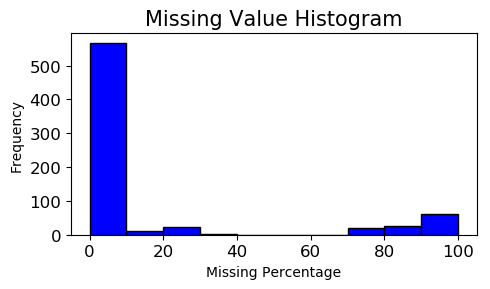

In [49]:
eda.plot_missing(df_csv)

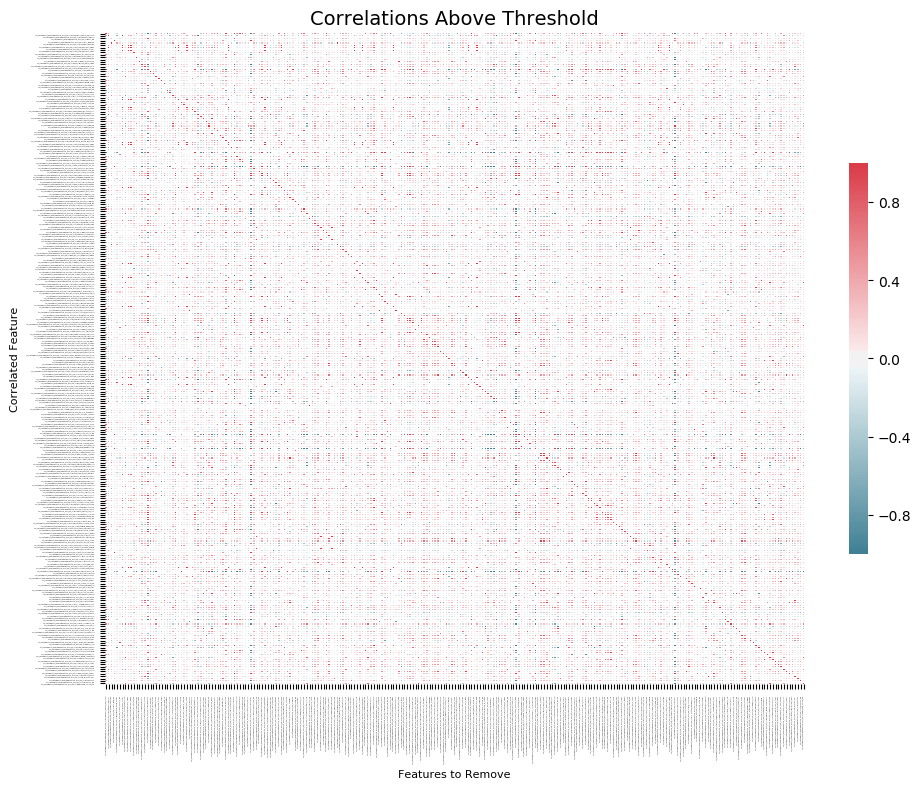

In [46]:
eda.plot_correlation(df_csv)

### Creating a Sample

In [24]:
sample=df_parquet.sample(frac=.005, random_state=42 )

In [25]:
sample.shape

(25914, 707)

### Creating Dependent Column

In [26]:
new_residual   =  0.9              # Residual value for new vehicle MSRP
cpo_residual   =  0.7              # Residual value for CPO vehicle MSRP
used_residual  =  0.5              # Residual value for used vehicle MSRP

In [171]:
sample['lifetime_value'] = sample['total_cust_pay'] + new_residual* sample['new_vehicle_purchase_value'] + cpo_residual*sample['cpo_vehicle_total_purchase_value'] + used_residual*sample['used_vehicle_total_purchase_value']


In [172]:
sample['dep_lifetime_value']= sample['dep_customer_pay_lexus_60mo'] + new_residual*sample['dep_new_msrp_lexus_60mo'] + cpo_residual*sample['dep_cpo_msrp_lexus_60mo'] + used_residual*sample['dep_used_msrp_lexus_60mo']

In [194]:
sample_new=sample[(sample['dep_lifetime_value']>0) & (sample['dep_lifetime_value']<100000)]

### Missing Value Imputation

In [201]:
df_imputed= prep.missing_value_imputation(sample_new, 'mean', 50)

In [202]:
df_imputed.shape

(9838, 603)

In [203]:
sum(df_imputed.isnull().sum()>0)

0

### Outlier Treatment

In [206]:
start=datetime.datetime.now()
df_outlier_treated=prep.outlier_treatment_dataframe(df_imputed)
print(datetime.datetime.now()-start)

0:00:01.514474


In [207]:
df_outlier_treated.head()

,no_owned_vehicle,no_new_purchase_vehicle,avg_assoc_length,max_assoc_length,no_sales_dealer_assoc,days_since_last_purchase_vehicle,avg_zip3_vehicle_val,owned_lexus_sedan_ind,owned_lexus_LUV_ind,owned_lexus_new_luv_ind,...,investors_cd,invest_in_mutual_fund_annts_cd,generation_group,last_serviced_dealer_markettype,customer_zipcode,pma_toy_scion_dealership_markettype,pma_lexus_dealership_markettype,mail_adr_latitude,mail_adr_longitude,deceased_ind
0,2.0,1.0,1226.500000,2208.0,2.0,245.0,39609.034140,1.0,1.0,0.0,...,U,U,Traditionals,Metro Point,15301-1476,Single Point,Metro Point,+40194685,-080295221,N
1,3.0,2.0,3003.333333,5590.0,2.0,2719.0,40267.824703,1.0,0.0,0.0,...,U,U,Boomers,Metro Point,21108-2577,Metro Market,Metro Point,+39096658,-076576922,N
2,1.0,1.0,3036.000000,3036.0,1.0,3036.0,39383.156146,0.0,1.0,1.0,...,U,U,Boomers,Metro Point,19803-1544,Metro Market,Metro Point,+39814841,-075553532,N
3,1.0,1.0,3297.000000,3297.0,1.0,3297.0,38740.720797,0.0,1.0,1.0,...,U,U,Gen X,Single Point,97138-4307,Single Point,,+46019192,-123911434,N
4,1.0,1.0,913.000000,913.0,1.0,913.0,40133.469775,0.0,1.0,1.0,...,U,U,Not Found,Single Point,34208-1879,Single Point,Single Point,+27495840,-082530347,N


### Type Casting

In [209]:
df_parquet_casted, num_to_cat= prep.type_casting(df_outlier_treated, num_level=10, cat_lavel=10 )

Total number of numerical Variables changed to Categorical Variable is 2
Total number of Categorical Variables dropped is 0


In [210]:
'hh_income' in df_outlier_treated.columns

False

In [211]:
df_outlier_treated.head()

,no_owned_vehicle,no_new_purchase_vehicle,avg_assoc_length,max_assoc_length,no_sales_dealer_assoc,days_since_last_purchase_vehicle,avg_zip3_vehicle_val,owned_lexus_sedan_ind,owned_lexus_LUV_ind,owned_lexus_new_luv_ind,...,healthy_living_cd,cruise_enthusiasts_prop_cd,interest_in_sports_prop_cd,investors_cd,invest_in_mutual_fund_annts_cd,generation_group,last_serviced_dealer_markettype,pma_toy_scion_dealership_markettype,pma_lexus_dealership_markettype,deceased_ind
0,2,1,1226.500000,2208.0,2,245.0,39609.034140,1,1,0,...,Y,5,6,U,U,Traditionals,Metro Point,Single Point,Metro Point,N
1,3,2,3003.333333,5590.0,2,2719.0,40267.824703,1,0,0,...,U,4,2,U,U,Boomers,Metro Point,Metro Market,Metro Point,N
2,1,1,3036.000000,3036.0,1,3036.0,39383.156146,0,1,1,...,U,3,2,U,U,Boomers,Metro Point,Metro Market,Metro Point,N
3,1,1,3297.000000,3297.0,1,3297.0,38740.720797,0,1,1,...,Y,6,5,U,U,Gen X,Single Point,Single Point,,N
4,1,1,913.000000,913.0,1,913.0,40133.469775,0,1,1,...,U,6,1,U,U,Not Found,Single Point,Single Point,Single Point,N


### One Unique value

In [212]:
unique_cols=prep.get_cols_with_one_unique_value(df_outlier_treated)

In [213]:
unique_cols[0]

'owned_toyota_ind'

In [216]:
df_cleaned=prep.remove_cols_with_one_unique_value(df_outlier_treated)

### Remove cols with One Unique value

In [217]:
df_removed_one=prep.remove_cols_with_one_unique_value(df_cleaned)

In [218]:
df_removed_one.shape

(9838, 264)

In [219]:
feat, df_corr=prep.remove_col_with_corr(df_removed_one, .75)

In [220]:
df_corr.head()

,no_owned_vehicle,no_new_purchase_vehicle,avg_assoc_length,no_sales_dealer_assoc,avg_zip3_vehicle_val,owned_lexus_sedan_ind,owned_lexus_LUV_ind,owned_lexus_new_luv_ind,owned_lexus_cpo_luv_ind,owned_lexus_new_sedan_ind,...,healthy_living_cd,cruise_enthusiasts_prop_cd,interest_in_sports_prop_cd,investors_cd,invest_in_mutual_fund_annts_cd,generation_group,last_serviced_dealer_markettype,pma_toy_scion_dealership_markettype,pma_lexus_dealership_markettype,deceased_ind
0,2,1,1226.500000,2,39609.034140,1,1,0,1,1,...,Y,5,6,U,U,Traditionals,Metro Point,Single Point,Metro Point,N
1,3,2,3003.333333,2,40267.824703,1,0,0,0,1,...,U,4,2,U,U,Boomers,Metro Point,Metro Market,Metro Point,N
2,1,1,3036.000000,1,39383.156146,0,1,1,0,0,...,U,3,2,U,U,Boomers,Metro Point,Metro Market,Metro Point,N
3,1,1,3297.000000,1,38740.720797,0,1,1,0,0,...,Y,6,5,U,U,Gen X,Single Point,Single Point,,N
4,1,1,913.000000,1,40133.469775,0,1,1,0,0,...,U,6,1,U,U,Not Found,Single Point,Single Point,Single Point,N


In [221]:
feat['drop_feature'].head()

0                    max_assoc_length
1    days_since_last_purchase_vehicle
2          new_vehicle_purchase_value
3          last_purchase_vehicle_msrp
4                   last_purchase_age
Name: drop_feature, dtype: object

In [25]:
df_corr.shape

(100, 210)

### Creating Dependent Vector

In [222]:
y=df_removed_one['dep_lifetime_value']

(array([6583.,  426.,   83.,  260., 1025.,  670.,  166.,   67.,  362.,
         196.]),
 array([1.0000000e-02, 7.7716290e+03, 1.5543248e+04, 2.3314867e+04,
        3.1086486e+04, 3.8858105e+04, 4.6629724e+04, 5.4401343e+04,
        6.2172962e+04, 6.9944581e+04, 7.7716200e+04]),
 <a list of 10 Patch objects>)

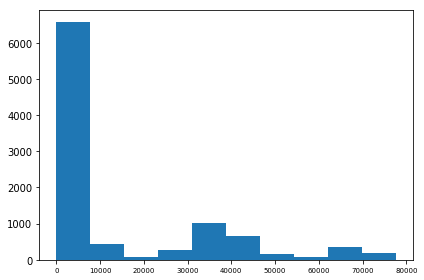

In [223]:
plt.hist(y)

### Creating Independent Matrix

In [224]:
X=prep.find_indep_feat(df_cleaned)

In [225]:
X.shape

(9838, 234)

In [226]:
X_encoded= prep.label_encode(X)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.svm import SVR, LinearSVR
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [227]:
X_train, X_test, y_train, y_test = modelData_split.modeldata_split_train_test(X_encoded, y, .3)

In [229]:
import StatisticalModels

('Ridge baseline model: Time Taken- ',
 '0.04881715774536133',
 '\nScore on Traing Set',
 '0.31147448647456455',
 '\nScore on Test Set ',
 '0.24576248127805522',
 '\nAdjusted R Square Score on Training Set ',
 '0.2872503141448469',
 '\nAdjusted R Square Score on Test Set',
 '0.1808042260771222')

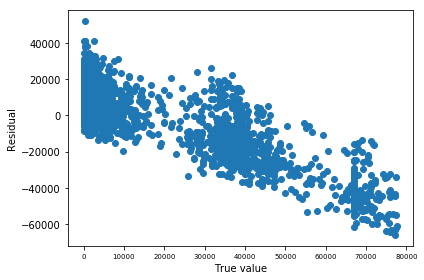

In [230]:
StatisticalModels.ridge_baseline_model(X_train, y_train, X_test, y_test)

('Lasso baseline model: Time Taken- ',
 '2.489837169647217',
 '\nScore on Traing Set ',
 '0.31144892799034096',
 '\nScore on Test Set ',
 '0.24629286323137964',
 '\nAdjusted R Square Score on Training Set ',
 '0.28722385644466963',
 '\nAdjusted R Square Score on Test Set ',
 '0.18138028685896268')

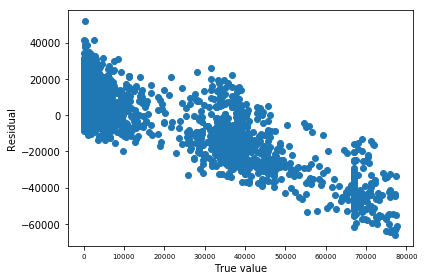

In [232]:
StatisticalModels.laso_baseline_model(X_train, y_train, X_test, y_test)

('Linear reg baseline model: Time Taken- ',
 '0.05825185775756836',
 '\n Score on Traing Set',
 '0.31148621034374324',
 ' \nScore on Test Set ',
 '0.24539646743924345',
 ' \nAdjusted R Square Score on Training Set ',
 '0.28726245049115506',
 ' \nAdjusted R Square Score on Test Set',
 '0.18040668951535066')

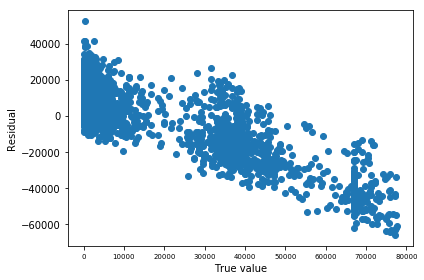

In [233]:
StatisticalModels.linear_baseline_model(X_train, y_train, X_test, y_test)

('Enet baseline model: Time Taken- ',
 '3.515167236328125',
 ' Score on Traing Set',
 '0.2220906929670684',
 ' Score on Test Set ',
 '0.1833538530581983',
 ' Adjusted R Square Score on Training Set ',
 '0.1947217592960857',
 ' Adjusted R Square Score on Test Set',
 '0.11302069207756471')

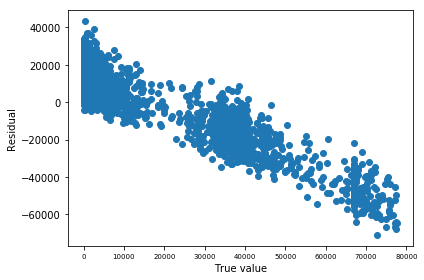

In [234]:
StatisticalModels.enet_baseline_model(X_train, y_train, X_test, y_test)

Convergence after  16  iterations


('Bayes regression baseline model : \nTime Taken- ',
 '0.1189413070678711',
 ' \nScore on Traing Set',
 '0.13305395061163894',
 ' \nScore on Test Set ',
 '0.11207121814331444',
 ' \nAdjusted R Square Score on Training Set ',
 '0.10255246578877375',
 ' \nAdjusted R Square Score on Test Set',
 '0.035598882863791315')

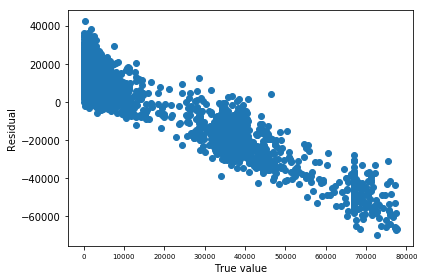

In [235]:
StatisticalModels.bayes_ridge_baseline_model(X_train, y_train, X_test, y_test)

('Decision tree regressor : \nTime Taken- ',
 '0.7417852878570557',
 ' \nScore on Traing Set',
 '1.0',
 ' \nScore on Test Set ',
 '-0.45077047019696814',
 ' \nAdjusted R Square Score on Training Set ',
 '1.0',
 ' \nAdjusted R Square Score on Test Set',
 '-0.5757172092569942')

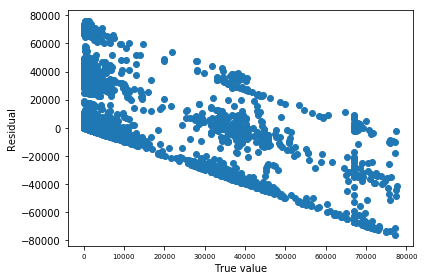

In [236]:
MLModels.mlmodel_decisionTree_regressor(X_train, y_train, X_test, y_test)

('Adaboost regressor: \nTime Taken- ',
 '1.6898479461669922',
 ' \nScore on Traing Set',
 '0.17811980594154342',
 ' \nScore on Test Set ',
 '0.12337534164040509',
 ' \nAdjusted R Square Score on Training Set ',
 '0.1492038586539658',
 ' \nAdjusted R Square Score on Test Set',
 '0.04787656723622946')

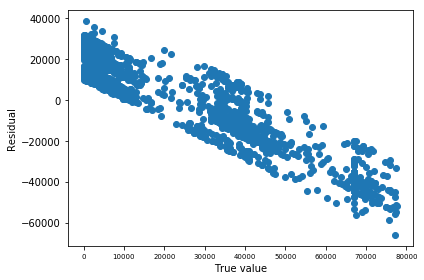

In [237]:
MLModels.mlmodel_adaboostTree_regressor(X_train, y_train, X_test, y_test, lime_flag=False, df_row=None)

('Random forest regressor : \nTime Taken- ',
 '4.322916030883789',
 ' \nScore on Traing Set',
 '0.8590593467694677',
 ' \nScore on Test Set ',
 '0.21645911422403752',
 ' \nAdjusted R Square Score on Training Set ',
 '0.8541006769670403',
 ' \nAdjusted R Square Score on Test Set',
 '0.14897712406151442')

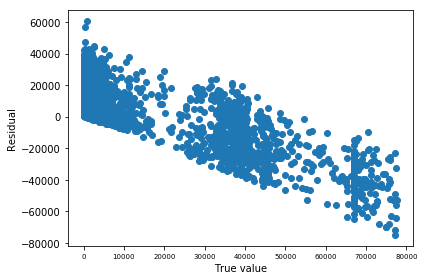

In [238]:
MLModels.mlmodel_randomForest_regressor(X_train, y_train, X_test, y_test)

('XGB regressor: \nTime Taken- ',
 '2.9870123863220215',
 ' \nScore on Traing Set',
 '0.3951444468870412',
 ' \nScore on Test Set ',
 '0.2837546367391308',
 ' \nAdjusted R Square Score on Training Set ',
 '0.37386400794125374',
 ' \nAdjusted R Square Score on Test Set',
 '0.22206843320470193')

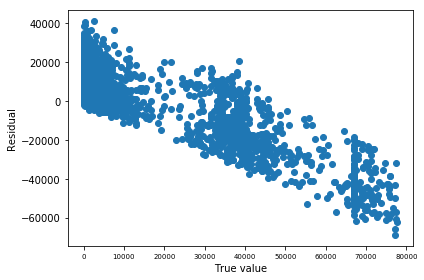

In [239]:
MLModels.mlmodel_xgb_regressor(X_train, y_train, X_test, y_test)

('LGBM regressor: \nTime Taken- ',
 '0.5359992980957031',
 ' \nScore on Traing Set',
 '0.2863579312478671',
 ' \nScore on Test Set ',
 '0.26169925355544554',
 ' \nAdjusted R Square Score on Training Set ',
 '0.2612500912105796',
 ' \nAdjusted R Square Score on Test Set',
 '0.19811354333534037')

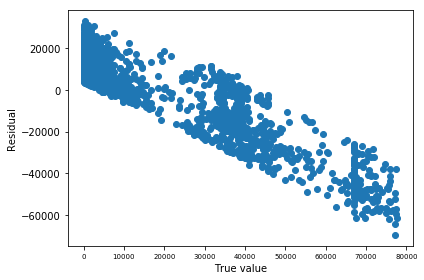

In [260]:
MLModels.mlmodel_lgbm_regressor(X_train, y_train, X_test, y_test)

0:	learn: 18468.8134573	total: 13.1ms	remaining: 13.1ms
1:	learn: 17996.3896554	total: 30.4ms	remaining: 0us


('Cat boost regressor: \nTime Taken- ',
 '0.42008328437805176',
 ' \nScore on Traing Set',
 '0.2302367537981833',
 ' \nScore on Test Set ',
 '0.22339599230175067',
 ' \nAdjusted R Square Score on Training Set ',
 '0.20315442037295028',
 ' \nAdjusted R Square Score on Test Set',
 '0.15651143661482003')

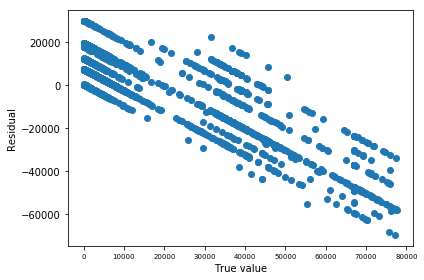

In [247]:
MLModels.mlmodel_catboost_regressor(X_train, y_train, X_test, y_test)

[LibSVM]

('Support vector regressor \nTime Taken- ',
 '41.88481378555298',
 ' \nScore on Traing Set',
 '-0.322215428054887',
 ' \nScore on Test Set ',
 '-0.2718962802509235',
 ' \nAdjusted R Square Score on Training Set ',
 '-0.36873450942082364',
 ' \nAdjusted R Square Score on Test Set',
 '-0.3814375866840174')

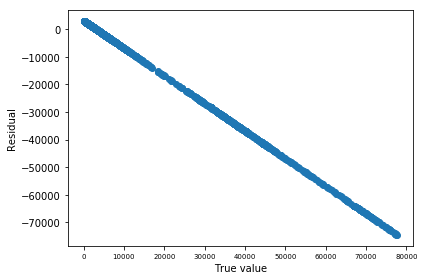

In [267]:
MLModels.mlmodel_svr_regressor(X_train, y_train, X_test, y_test)

In [283]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train.select_dtypes(include= 'number'))


X_train_new= pd.concat([pd.DataFrame(scaler.transform(X_train.select_dtypes(include= 'number')), columns=X_train.columns), X_train.select_dtypes(exclude= 'number') ])
X_test_new= pd.concat([pd.DataFrame(scaler.transform(X_test.select_dtypes(include= 'number')), columns=X_test.columns), X_train.select_dtypes(exclude= 'number') ])


In [287]:
X_test_new.shape

(9838, 234)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.24848154496677852, total=   0.8s
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.2828795458896971, total=   0.9s
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.2499712496425398, total=   1.3s
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.27234939891662224, total=   0.9s
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.2543530820394735, total=   0.9s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.245094109657556, total=   1.2s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.1s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.280763801984273, total=   1.2s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.4s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.24517187116537653, total=   1.3s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.7s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.2696472852153149, total=   1.2s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.0s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.2492442781922003, total=   1.2s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................
[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.24297169339699484, total=   1.2s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................
[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.28111012167513205, total=   1.3s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................
[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.24749808922006244, total=   1.3s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................
[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.269489340631489, total=   1.2s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................
[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.24921839410096092, total=   1.3s
[CV] alpha=0.1, fit_intercept=False, normalize=False .................
[CV]  a

[CV]  alpha=10.0, fit_intercept=False, normalize=False, score=0.25760456947570065, total=   1.2s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.1min finished


('Lasso Grid search : \nTime Taken- ',
 '63.763007402420044',
 ' \nScore on Traing Set',
 '0.29988650008442663',
 ' \nScore on Test Set ',
 '0.2632282248654869',
 ' \nAdjusted R Square Score on Training Set ',
 '0.2752546313458544',
 ' \nAdjusted R Square Score on Test Set',
 '0.1997741963850026',
 '\n Best Parameters',
 "{'alpha': 1.0, 'fit_intercept': True, 'normalize': True}")

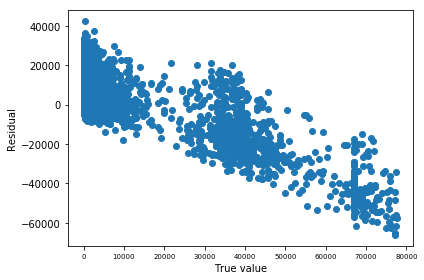

In [261]:
StatisticalModels.lasso_grid_search(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................
[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.25262942696505264, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................
[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.28054052748668523, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................
[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.25354730423750116, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................
[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.27608126710479897, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.269230013986424, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................
[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.24503938124844793, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................
[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.2807443289513317, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................
[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.24515175415198187, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................
[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.26959905153004726, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................
[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.24917162540545723, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.24447076717573477, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................
[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.2808545099906181, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................
[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.24581206845524148, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................
[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.2690174309381955, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................
[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.24941254187799433, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False .................
[CV]  alpha=0.1, fit_intercept=False, normalize=False, score=0.24447076717573477, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False .................
[CV] 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.2s finished


('Ridge Grid search : \nTime Taken- ',
 '2.22212290763855',
 ' \nScore on Traing Set',
 '0.30139432553726453',
 ' \nScore on Test Set ',
 '0.2557735947293658',
 ' \nAdjusted R Square Score on Training Set ',
 '0.2768155061380343',
 ' \nAdjusted R Square Score on Test Set',
 '0.19167754068691878',
 '\n Best Parameters',
 "{'alpha': 0.1, 'fit_intercept': True, 'normalize': True}")

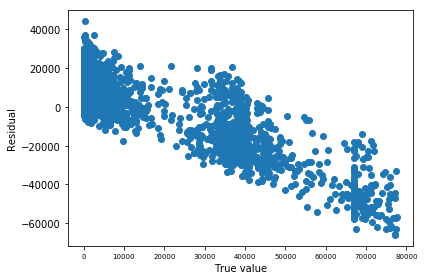

In [270]:
StatisticalModels.ridge_grid_search(X_train, y_train, X_test, y_test)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] fit_intercept=True ..............................................
[CV] ..... fit_intercept=True, score=0.2439073694861995, total=   0.0s
[CV] fit_intercept=True ..............................................
[CV] .... fit_intercept=True, score=0.22029264172684235, total=   0.0s
[CV] fit_intercept=False .............................................
[CV] ... fit_intercept=False, score=0.24390736861627493, total=   0.1s
[CV] fit_intercept=False .............................................
[CV] ... fit_intercept=False, score=0.22029263446324718, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


('Linear Grid search : \nTime Taken- ',
 '0.25809741020202637',
 ' \nScore on Traing Set',
 '0.31148621034374335',
 ' \nScore on Test Set ',
 '0.24539646738564747',
 ' \nAdjusted R Square Score on Training Set ',
 '0.28726245049115506',
 ' \nAdjusted R Square Score on Test Set',
 '0.18040668945713867',
 '\n Best Parameters',
 "{'fit_intercept': True}")

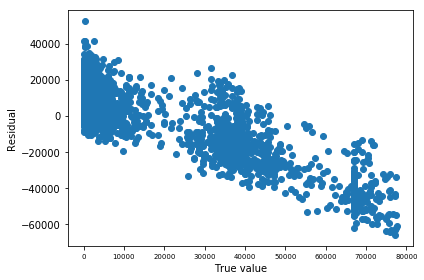

In [271]:
StatisticalModels.linear_grid_search(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........... alpha=0.001, score=0.24673231028763665, total=   1.5s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ........... alpha=0.001, score=0.28157149824141403, total=   1.3s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] ........... alpha=0.001, score=0.24694811669011887, total=   1.5s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s


[CV] ............ alpha=0.001, score=0.2707517501521147, total=   1.5s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.8s remaining:    0.0s


[CV] ............ alpha=0.001, score=0.2507971650267927, total=   1.5s
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.3s remaining:    0.0s


[CV] ............. alpha=0.1, score=0.25198059083172564, total=   1.8s
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.1s remaining:    0.0s


[CV] .............. alpha=0.1, score=0.2842218456051341, total=   1.8s
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.9s remaining:    0.0s


[CV] .............. alpha=0.1, score=0.2510643759568154, total=   1.8s
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.7s remaining:    0.0s


[CV] .............. alpha=0.1, score=0.2666007375330064, total=   1.7s
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   14.4s remaining:    0.0s


[CV] ............. alpha=0.1, score=0.26085767202289534, total=   1.8s
[CV] alpha=10 ........................................................
[CV] .............. alpha=10, score=0.11720614492761694, total=   1.1s
[CV] alpha=10 ........................................................
[CV] ............... alpha=10, score=0.1631599731188822, total=   1.2s
[CV] alpha=10 ........................................................
[CV] .............. alpha=10, score=0.12176040445625348, total=   1.1s
[CV] alpha=10 ........................................................
[CV] .................. alpha=10, score=0.1544920285843, total=   1.1s
[CV] alpha=10 ........................................................
[CV] .............. alpha=10, score=0.13590532887812656, total=   1.1s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   21.9s finished


('eNet Grid search  : \nTime Taken- ',
 '23.96636438369751',
 ' \nScore on Traing Set',
 '0.29734778218834224',
 ' \nScore on Test Set ',
 '0.2463005287094131',
 ' \nAdjusted R Square Score on Training Set ',
 '0.27262659455220817',
 ' \nAdjusted R Square Score on Test Set',
 '0.18138861252170702',
 '\n Best Parameters',
 "{'alpha': 0.1}")

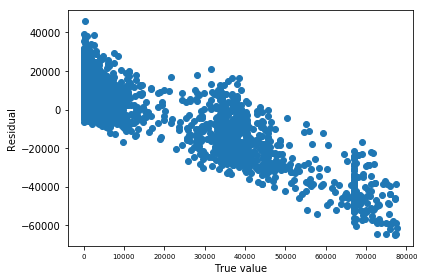

In [272]:
StatisticalModels.elasticNet_grid_search(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................
[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.25262942696505264, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................
[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.28054052748668523, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................
[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.25354730423750116, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................
[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.27608126710479897, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, normalize=True, score=0.269230013986424, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................
[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.24503938124844793, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................
[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.2807443289513317, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................
[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.24515175415198187, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................
[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.26959905153004726, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False ..................
[CV]  alpha=0.1, fit_intercept=True, normalize=False, score=0.24917162540545723, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.24447076717573477, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................
[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.2808545099906181, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................
[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.24581206845524148, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................
[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.2690174309381955, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True ..................
[CV]  alpha=0.1, fit_intercept=False, normalize=True, score=0.24941254187799433, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False .................
[CV]  alpha=0.1, fit_intercept=False, normalize=False, score=0.24447076717573477, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False .................
[CV] 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.9s finished


('Ridge Grid search : \nTime Taken- ',
 '1.980088710784912',
 ' \nScore on Traing Set',
 '0.30139432553726453',
 ' \nScore on Test Set ',
 '0.2557735947293658',
 ' \nAdjusted R Square Score on Training Set ',
 '0.2768155061380343',
 ' \nAdjusted R Square Score on Test Set',
 '0.19167754068691878',
 '\n Best Parameters',
 "{'alpha': 0.1, 'fit_intercept': True, 'normalize': True}")

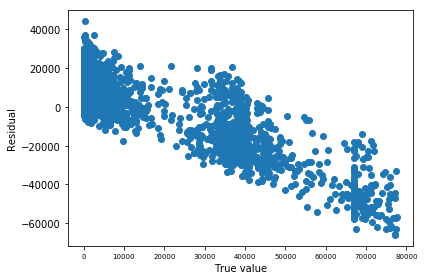

In [273]:
StatisticalModels.ridge_grid_search(X_train, y_train, X_test, y_test)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   27.9s remaining:   27.9s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   28.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   28.0s finished


('Decision tree gidsearchcv : \nTime Taken- ',
 '28.4908390045166',
 ' \nScore on Traing Set',
 '0.18938374434048644',
 ' \nScore on Test Set ',
 '0.18682970420870137',
 ' \nAdjusted R Square Score on Training Set ',
 '0.1608640925852125',
 ' \nAdjusted R Square Score on Test Set',
 '0.11679589882954644',
 '\n Best Parameters',
 "{'max_depth': 2}")

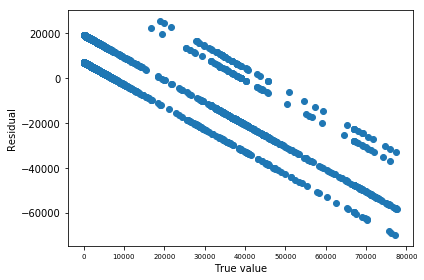

In [274]:
MLModels.decisionTree_regressor_gridsearchcv(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:   13.9s finished


('Random reg griadsearchcv  : \nTime Taken- ',
 '15.969971895217896',
 ' \nScore on Traing Set',
 '0.31002358369110006',
 ' \nScore on Test Set ',
 '0.2638392624848953',
 ' \nAdjusted R Square Score on Training Set ',
 '0.2857483647140616',
 ' \nAdjusted R Square Score on Test Set',
 '0.20043785925392943',
 '\n Best Parameters',
 "{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20}")

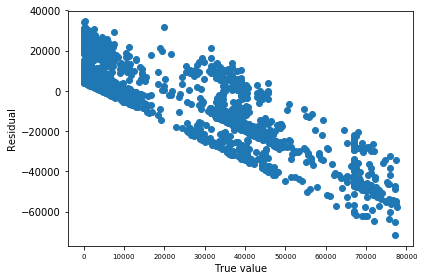

In [275]:
MLModels.randonForest_regressor_gridsearchcv(X_train, y_train, X_test, y_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] learning_rate=0.001 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... learning_rate=0.001, score=0.11932457231853623, total=  14.1s
[CV] learning_rate=0.001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s


[CV] ... learning_rate=0.001, score=0.08297793561048317, total=  14.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.3s finished


('AdaBoost regressor gidsearchcv : \nTime Taken- ',
 '59.316420555114746',
 ' \nScore on Traing Set',
 '0.9993261676942621',
 ' \nScore on Test Set ',
 '0.13393762017469135',
 ' \nAdjusted R Square Score on Training Set ',
 '0.9993024604683498',
 ' \nAdjusted R Square Score on Test Set',
 '0.059348515692128956',
 '\n Best Parameters',
 "{'learning_rate': 0.001}")

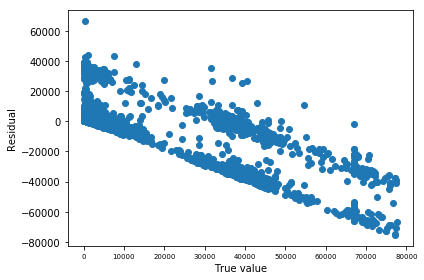

In [276]:
MLModels.adaBoost_regressor_gridsearchcv(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:   37.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   38.5s finished


('XGB gridsearch regressor score :  Time Taken- ',
 '43.61059212684631',
 '  Score on Traing Set',
 '0.49337493974621227',
 '  Score on Test Set ',
 '0.2913557615424207',
 '  Adjusted R Square Score on Training Set ',
 '0.4755505127278111',
 '  Adjusted R Square Score on Test Set',
 '0.2303242003355478',
 '  Best Parameters',
 "{'learning_rate': 0.05, 'max_depth': 5, 'objective': 'reg:linear'}")

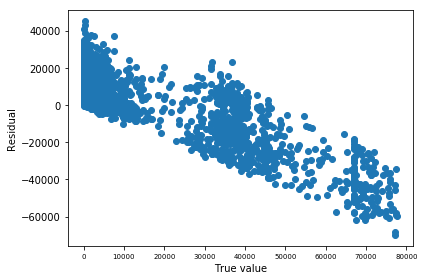

In [281]:
MLModels.XGB_regressor_gridsearchcv(X_train, y_train, X_test, y_test)

In [278]:
def randonForest_regressor_gridsearchcv(Xtrain_in, ytrain_in, Xtest_in, n_jobs= -1, ytest_in, lime_flag=False, df_row=None, param_grid= { "n_estimators": [10,20,30],"max_features" : ["auto", "sqrt", "log2"],    "max_depth": [1,3,5], "min_samples_split" : [2,4,8], "bootstrap": [True, False], "min_samples_split": [2, 5, 10] }):
    '''Parameters
    ------
    Xtrain_in: Data Frame of Independent columns for training set
    ytrain_in: Target Vector of training set
    Xtest_in: Data Frame of Independent columns for test set
    ytest_in: Target Vector of test set
    lime_flag: Boolean. Whether to use lime default is False
    df_row=None
    parameter/param_grid: parameter to be tuned using grid search
    Returns Time taken, train score , test score, train ms score, test ms score, adj R score for train, adj R score for test
    '''
    start_time            = time.time()
    randomregrid          = RandomForestRegressor(random_state=0)
    '''param_grid            = { 
    "n_estimators"      : [10,20,30],
    "max_features"      : ["auto", "sqrt", "log2"],
    "max_depth": [1,3,5],
    "min_samples_split" : [2,4,8],
    "bootstrap": [True, False],
    "min_samples_split": [2, 5, 10]
    }
    '''

    grid                   = GridSearchCV(randomregrid, param_grid, n_jobs=-1, cv=5, verbose=5)
    grid.fit(Xtrain_in, ytrain_in)
    score_test             = grid.score(Xtest_in, ytest_in)
    score_train            =grid.score(Xtrain_in, ytrain_in)
    adj_Rscore_train       = adjusted_R2score_calc(Xtrain_in, score_train)
    adj_Rscore_test        = adjusted_R2score_calc(Xtest_in, score_test)
    best_parameters        =grid.best_params_
    mrs_train              = mean_squared_error(grid.predict(Xtrain_in), ytrain_in)
    mrs_test               = mean_squared_error(grid.predict(Xtest_in), ytest_in)
    if lime_flag:
        lime_explainer(Xtrain_in, df_row, grid, "Random_grid")    
    time_end                =time.time() - start_time
    log_record_result("Random reg griadsearchcv ", time_end, score_train, score_test, adj_Rscore_train, adj_Rscore_test, mrs_train=mrs_train, mrs_test=mrs_test, best_param=best_parameters)
    plot_residuals(Xtest_in, ytest_in, grid, "Random_grid") #plots residual
    return "Random reg griadsearchcv  :  Time Taken- " ,  str(time_end), "  Score on Traing Set", str(score_train ), "  Score on Test Set " ,str(score_test), "  Adjusted R Square Score on Training Set ", str(adj_Rscore_train), "  Adjusted R Square Score on Test Set",  str(adj_Rscore_test) , "  Best Parameters", str(best_parameters)


SyntaxError: non-default argument follows default argument (<ipython-input-278-089dd3a4821b>, line 1)

In [ ]:
ra

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] learning_rate=0.01, n_estimators=20 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, n_estimators=20, score=0.08684044565657556, total=   0.5s
[CV] learning_rate=0.01, n_estimators=20 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=20, score=0.08950285911631184, total=   0.5s
[CV] learning_rate=0.01, n_estimators=20 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=20, score=0.09266657158238223, total=   0.5s
[CV] learning_rate=0.01, n_estimators=40 .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=40, score=0.14548656346299926, total=   0.7s
[CV] learning_rate=0.01, n_estimators=40 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=40, score=0.14909787071753378, total=   0.8s
[CV] learning_rate=0.01, n_estimators=40 .............................
[CV]  learning_rate=0.01, n_estimators=40, score=0.15116538332601337, total=   0.9s
[CV] learning_rate=0.1, n_estimators=20 ..............................
[CV]  learning_rate=0.1, n_estimators=20, score=0.2645756358599305, total=   0.5s
[CV] learning_rate=0.1, n_estimators=20 ..............................
[CV]  learning_rate=0.1, n_estimators=20, score=0.27556273088535554, total=   0.5s
[CV] learning_rate=0.1, n_estimators=20 ..............................
[CV]  learning_rate=0.1, n_estimators=20, score=0.2654619120475664, total=   0.5s
[CV] learning_rate=0.1, n_estimators=40 ..............................
[CV]  learning_rate=0.1, n_estimators=40, score=0.27024882020167706, total=   0.7s
[CV] learning_rate=0.1, n_estimators=40 ..............................
[CV]  learning_rate=0.1, n_estimators=40, score=0.28229079529243395, total= 

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   12.0s finished


('LGBM gidsearchcv score : \nTime Taken- ',
 '13.091769218444824',
 ' \nScore on Traing Set',
 '0.5524575777462694',
 ' \nScore on Test Set ',
 '0.2854108537098582',
 ' \nAdjusted R Square Score on Training Set ',
 '0.5367118362326063',
 ' \nAdjusted R Square Score on Test Set',
 '0.22386729087147272',
 '\n Best Parameters',
 "{'learning_rate': 0.1, 'n_estimators': 40}")

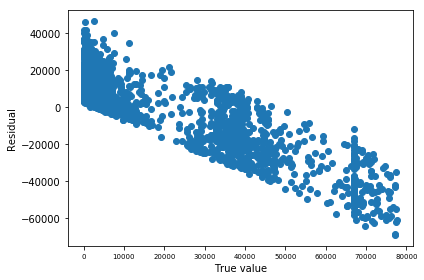

In [282]:
MLModels.lgbm_regressor_gridsearchcv(X_train, y_train, X_test, y_test)

In [279]:
def XGB_regressor_gridsearchcv(Xtrain_in, ytrain_in, Xtest_in, ytest_in, lime_flag=False, df_row=None, parameters= {'learning_rate': [.03, 0.05], 'objective':['reg:linear'],'learning_rate': [.03, 0.05, .07],'max_depth': [5, 6, 7]}):
    '''Parameters
    ------
    Xtrain_in: Data Frame of Independent columns for training set
    ytrain_in: Target Vector of training set
    Xtest_in: Data Frame of Independent columns for test set
    ytest_in: Target Vector of test set
    lime_flag: Boolean. Whether to use lime default is False
    df_row=None
    parameter/param_grid: parameter to be tuned using grid search
    Returns Time taken, train score , test score, train ms score, test ms score, adj R score for train, adj R score for test
    '''
    start_time              = time.time()
    xgbreg                  = XGBRegressor()
    #parameters              = {'learning_rate': [.03, 0.05], 'objective':['reg:linear'],'learning_rate': [.03, 0.05, .07],'max_depth': [5, 6, 7]}
    grid                    = GridSearchCV(xgbreg,parameters,cv = 5 ,n_jobs = -1, verbose=True)
    grid.fit(Xtrain_in, ytrain_in)
    y_test_pred             =grid.predict(Xtest_in)
    y_train_pred            =grid.predict(Xtrain_in)
    score_test              =r2_score(ytest_in,y_test_pred)
    score_train             =r2_score(ytrain_in,y_train_pred)
    adj_Rscore_train        = adjusted_R2score_calc(Xtrain_in, score_train)
    adj_Rscore_test         = adjusted_R2score_calc(Xtest_in, score_test)
    mrs_train              = mean_squared_error(y_train_pred, ytrain_in)
    mrs_test               = mean_squared_error(y_test_pred, ytest_in)
    best_parameters         =grid.best_params_
    if lime_flag:
        lime_explainer(Xtrain_in, df_row, grid, "XGB_grid")
    time_end                =time.time() - start_time
    log_record_result("XGB regressor score", time_end, score_train, score_test, adj_Rscore_train, adj_Rscore_test, mrs_train=mrs_train, mrs_test=mrs_test, best_param=best_parameters)
    plot_residuals(Xtest_in, ytest_in, grid, "XGB_grid") #plots residual
    return "XGB gridsearch regressor score :  Time Taken- " ,  str(time_end), "  Score on Traing Set", str(score_train ), "  Score on Test Set " ,str(score_test), "  Adjusted R Square Score on Training Set ", str(adj_Rscore_train), "  Adjusted R Square Score on Test Set",  str(adj_Rscore_test) , "  Best Parameters", str(best_parameters)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 24977.2824195	total: 25.6ms	remaining: 25.6s
1:	learn: 24667.2547943	total: 42.6ms	remaining: 21.3s
2:	learn: 24343.1326630	total: 66.6ms	remaining: 22.1s
3:	learn: 24044.2526366	total: 86.6ms	remaining: 21.6s
4:	learn: 23752.5730961	total: 103ms	remaining: 20.5s
5:	learn: 23493.9282396	total: 118ms	remaining: 19.6s
6:	learn: 23227.0440059	total: 143ms	remaining: 20.2s
7:	learn: 22991.6006281	total: 161ms	remaining: 19.9s
8:	learn: 22760.1111571	total: 179ms	remaining: 19.8s
9:	learn: 22517.7727163	total: 201ms	remaining: 19.9s
10:	learn: 22297.4093972	total: 227ms	remaining: 20.4s
11:	learn: 22085.8104608	total: 250ms	remaining: 20.6s
12:	learn: 21872.9475604	total: 276ms	remaining: 20.9s
13:	learn: 21685.0212363	total: 291ms	remaining: 20.5s
14:	learn: 21516.3132428	total: 309ms	remaining: 20.3s
15:	learn: 21351.8594626	total: 332ms	remaining: 20.4s
16:	learn: 21194.2214453	total: 355ms	remaining: 20.5s
17:	learn: 21042.1839381	total: 371ms	remaining: 20.2s
18:	learn: 20891

152:	learn: 17214.1559828	total: 2.7s	remaining: 15s
153:	learn: 17212.2549147	total: 2.72s	remaining: 15s
154:	learn: 17206.1932124	total: 2.74s	remaining: 14.9s
155:	learn: 17199.9350770	total: 2.76s	remaining: 14.9s
156:	learn: 17196.4753536	total: 2.77s	remaining: 14.9s
157:	learn: 17189.1785842	total: 2.79s	remaining: 14.8s
158:	learn: 17185.0131827	total: 2.81s	remaining: 14.8s
159:	learn: 17180.9779932	total: 2.83s	remaining: 14.8s
160:	learn: 17176.7789784	total: 2.85s	remaining: 14.8s
161:	learn: 17173.7539196	total: 2.86s	remaining: 14.8s
162:	learn: 17166.2484958	total: 2.88s	remaining: 14.8s
163:	learn: 17161.7421486	total: 2.9s	remaining: 14.8s
164:	learn: 17157.4911885	total: 2.92s	remaining: 14.8s
165:	learn: 17153.7201311	total: 2.93s	remaining: 14.7s
166:	learn: 17150.1992610	total: 2.95s	remaining: 14.7s
167:	learn: 17147.1101722	total: 2.97s	remaining: 14.7s
168:	learn: 17142.8309498	total: 2.98s	remaining: 14.7s
169:	learn: 17136.8286201	total: 3s	remaining: 14.6s
1

310:	learn: 16623.2456270	total: 5.6s	remaining: 12.4s
311:	learn: 16621.0140457	total: 5.61s	remaining: 12.4s
312:	learn: 16616.5405267	total: 5.63s	remaining: 12.4s
313:	learn: 16614.4959070	total: 5.64s	remaining: 12.3s
314:	learn: 16610.8299359	total: 5.66s	remaining: 12.3s
315:	learn: 16606.3097856	total: 5.68s	remaining: 12.3s
316:	learn: 16602.2139257	total: 5.7s	remaining: 12.3s
317:	learn: 16598.4391977	total: 5.72s	remaining: 12.3s
318:	learn: 16596.1568039	total: 5.73s	remaining: 12.2s
319:	learn: 16594.7562860	total: 5.75s	remaining: 12.2s
320:	learn: 16591.2470120	total: 5.77s	remaining: 12.2s
321:	learn: 16589.6670390	total: 5.78s	remaining: 12.2s
322:	learn: 16587.0385248	total: 5.8s	remaining: 12.2s
323:	learn: 16584.0650395	total: 5.82s	remaining: 12.1s
324:	learn: 16576.4937303	total: 5.84s	remaining: 12.1s
325:	learn: 16571.6305667	total: 5.86s	remaining: 12.1s
326:	learn: 16564.5373411	total: 5.88s	remaining: 12.1s
327:	learn: 16560.1923147	total: 5.9s	remaining: 12

467:	learn: 16107.4792594	total: 8.49s	remaining: 9.65s
468:	learn: 16105.3959793	total: 8.5s	remaining: 9.62s
469:	learn: 16102.8803383	total: 8.52s	remaining: 9.61s
470:	learn: 16100.9139209	total: 8.54s	remaining: 9.59s
471:	learn: 16099.6551198	total: 8.56s	remaining: 9.57s
472:	learn: 16096.2667947	total: 8.58s	remaining: 9.56s
473:	learn: 16095.7590188	total: 8.6s	remaining: 9.54s
474:	learn: 16093.3916702	total: 8.61s	remaining: 9.52s
475:	learn: 16090.7981190	total: 8.63s	remaining: 9.5s
476:	learn: 16089.7648842	total: 8.65s	remaining: 9.49s
477:	learn: 16087.1882160	total: 8.67s	remaining: 9.47s
478:	learn: 16086.2761017	total: 8.69s	remaining: 9.45s
479:	learn: 16081.8855346	total: 8.71s	remaining: 9.43s
480:	learn: 16077.3708010	total: 8.72s	remaining: 9.41s
481:	learn: 16075.3398396	total: 8.74s	remaining: 9.39s
482:	learn: 16072.1427099	total: 8.76s	remaining: 9.38s
483:	learn: 16070.6107842	total: 8.79s	remaining: 9.37s
484:	learn: 16067.1987223	total: 8.81s	remaining: 9

619:	learn: 15738.8455201	total: 11.4s	remaining: 7.01s
620:	learn: 15736.9370166	total: 11.5s	remaining: 6.99s
621:	learn: 15732.3962713	total: 11.5s	remaining: 6.97s
622:	learn: 15727.7857560	total: 11.5s	remaining: 6.96s
623:	learn: 15726.5284266	total: 11.5s	remaining: 6.94s
624:	learn: 15724.7507381	total: 11.5s	remaining: 6.92s
625:	learn: 15721.9790304	total: 11.6s	remaining: 6.91s
626:	learn: 15719.7867705	total: 11.6s	remaining: 6.89s
627:	learn: 15717.3596886	total: 11.6s	remaining: 6.87s
628:	learn: 15716.7561917	total: 11.6s	remaining: 6.85s
629:	learn: 15715.9469014	total: 11.6s	remaining: 6.83s
630:	learn: 15713.0888796	total: 11.6s	remaining: 6.81s
631:	learn: 15709.7577765	total: 11.7s	remaining: 6.79s
632:	learn: 15706.5290998	total: 11.7s	remaining: 6.77s
633:	learn: 15706.1410121	total: 11.7s	remaining: 6.75s
634:	learn: 15704.9360136	total: 11.7s	remaining: 6.73s
635:	learn: 15704.0019533	total: 11.7s	remaining: 6.71s
636:	learn: 15703.3364484	total: 11.8s	remaining

771:	learn: 15413.7148699	total: 14.1s	remaining: 4.17s
772:	learn: 15411.5683198	total: 14.1s	remaining: 4.15s
773:	learn: 15409.9849104	total: 14.1s	remaining: 4.13s
774:	learn: 15408.1841854	total: 14.2s	remaining: 4.11s
775:	learn: 15406.8889166	total: 14.2s	remaining: 4.09s
776:	learn: 15404.5422273	total: 14.2s	remaining: 4.07s
777:	learn: 15402.7126570	total: 14.2s	remaining: 4.05s
778:	learn: 15401.9757449	total: 14.2s	remaining: 4.03s
779:	learn: 15399.3065902	total: 14.3s	remaining: 4.02s
780:	learn: 15396.6859562	total: 14.3s	remaining: 4s
781:	learn: 15394.1899566	total: 14.3s	remaining: 3.98s
782:	learn: 15392.1411864	total: 14.3s	remaining: 3.96s
783:	learn: 15390.5061936	total: 14.3s	remaining: 3.95s
784:	learn: 15387.8437465	total: 14.3s	remaining: 3.93s
785:	learn: 15385.8826575	total: 14.4s	remaining: 3.91s
786:	learn: 15383.8540182	total: 14.4s	remaining: 3.89s
787:	learn: 15382.3393428	total: 14.4s	remaining: 3.87s
788:	learn: 15381.6430761	total: 14.4s	remaining: 3

920:	learn: 15127.7532658	total: 16.8s	remaining: 1.44s
921:	learn: 15126.8240368	total: 16.8s	remaining: 1.42s
922:	learn: 15124.8296054	total: 16.9s	remaining: 1.41s
923:	learn: 15122.9824441	total: 16.9s	remaining: 1.39s
924:	learn: 15121.9625481	total: 16.9s	remaining: 1.37s
925:	learn: 15118.6498656	total: 16.9s	remaining: 1.35s
926:	learn: 15118.4675875	total: 16.9s	remaining: 1.33s
927:	learn: 15117.1131451	total: 16.9s	remaining: 1.31s
928:	learn: 15116.0563604	total: 17s	remaining: 1.3s
929:	learn: 15112.5149534	total: 17s	remaining: 1.28s
930:	learn: 15110.4905856	total: 17s	remaining: 1.26s
931:	learn: 15109.4904942	total: 17s	remaining: 1.24s
932:	learn: 15106.4975462	total: 17s	remaining: 1.22s
933:	learn: 15103.4512555	total: 17.1s	remaining: 1.21s
934:	learn: 15101.8807038	total: 17.1s	remaining: 1.19s
935:	learn: 15099.8217378	total: 17.1s	remaining: 1.17s
936:	learn: 15096.8462808	total: 17.1s	remaining: 1.15s
937:	learn: 15091.7258914	total: 17.1s	remaining: 1.13s
938

79:	learn: 17643.7416614	total: 1.71s	remaining: 19.6s
80:	learn: 17627.4127796	total: 1.73s	remaining: 19.7s
81:	learn: 17617.3699634	total: 1.76s	remaining: 19.7s
82:	learn: 17604.2476249	total: 1.77s	remaining: 19.6s
83:	learn: 17597.0207313	total: 1.78s	remaining: 19.5s
84:	learn: 17582.2679957	total: 1.8s	remaining: 19.4s
85:	learn: 17573.8667910	total: 1.83s	remaining: 19.4s
86:	learn: 17564.3613477	total: 1.84s	remaining: 19.4s
87:	learn: 17551.8200139	total: 1.87s	remaining: 19.4s
88:	learn: 17544.8458657	total: 1.89s	remaining: 19.3s
89:	learn: 17538.8835216	total: 1.91s	remaining: 19.3s
90:	learn: 17529.4874874	total: 1.94s	remaining: 19.3s
91:	learn: 17523.6693891	total: 1.96s	remaining: 19.3s
92:	learn: 17510.5683879	total: 1.98s	remaining: 19.3s
93:	learn: 17502.0635627	total: 1.99s	remaining: 19.2s
94:	learn: 17493.8369461	total: 2.01s	remaining: 19.1s
95:	learn: 17488.1976678	total: 2.03s	remaining: 19.1s
96:	learn: 17478.7928381	total: 2.05s	remaining: 19s
97:	learn: 17

227:	learn: 16801.7605150	total: 4.62s	remaining: 15.6s
228:	learn: 16798.0494003	total: 4.63s	remaining: 15.6s
229:	learn: 16794.2869017	total: 4.65s	remaining: 15.6s
230:	learn: 16791.5779996	total: 4.67s	remaining: 15.5s
231:	learn: 16789.5573767	total: 4.69s	remaining: 15.5s
232:	learn: 16787.7536554	total: 4.71s	remaining: 15.5s
233:	learn: 16784.1878614	total: 4.73s	remaining: 15.5s
234:	learn: 16781.4449138	total: 4.75s	remaining: 15.4s
235:	learn: 16779.3827204	total: 4.76s	remaining: 15.4s
236:	learn: 16774.5140953	total: 4.78s	remaining: 15.4s
237:	learn: 16773.4833405	total: 4.8s	remaining: 15.4s
238:	learn: 16771.2938729	total: 4.81s	remaining: 15.3s
239:	learn: 16765.9086169	total: 4.83s	remaining: 15.3s
240:	learn: 16764.4335880	total: 4.85s	remaining: 15.3s
241:	learn: 16761.5855471	total: 4.87s	remaining: 15.3s
242:	learn: 16759.6256100	total: 4.89s	remaining: 15.2s
243:	learn: 16759.6035607	total: 4.9s	remaining: 15.2s
244:	learn: 16756.0338678	total: 4.91s	remaining: 

380:	learn: 16252.6912236	total: 7.56s	remaining: 12.3s
381:	learn: 16248.6939173	total: 7.57s	remaining: 12.2s
382:	learn: 16245.2007129	total: 7.59s	remaining: 12.2s
383:	learn: 16242.2175619	total: 7.61s	remaining: 12.2s
384:	learn: 16238.2910437	total: 7.62s	remaining: 12.2s
385:	learn: 16234.9115842	total: 7.64s	remaining: 12.2s
386:	learn: 16231.8110020	total: 7.66s	remaining: 12.1s
387:	learn: 16227.0784368	total: 7.68s	remaining: 12.1s
388:	learn: 16224.5828413	total: 7.7s	remaining: 12.1s
389:	learn: 16222.3414664	total: 7.72s	remaining: 12.1s
390:	learn: 16220.3483003	total: 7.74s	remaining: 12.1s
391:	learn: 16216.2839060	total: 7.75s	remaining: 12s
392:	learn: 16212.9297680	total: 7.77s	remaining: 12s
393:	learn: 16209.4411825	total: 7.79s	remaining: 12s
394:	learn: 16204.9926490	total: 7.8s	remaining: 12s
395:	learn: 16203.0320320	total: 7.82s	remaining: 11.9s
396:	learn: 16199.3032136	total: 7.84s	remaining: 11.9s
397:	learn: 16194.6122302	total: 7.86s	remaining: 11.9s
39

529:	learn: 15786.9687277	total: 10s	remaining: 8.88s
530:	learn: 15785.7773575	total: 10s	remaining: 8.87s
531:	learn: 15782.3344302	total: 10.1s	remaining: 8.85s
532:	learn: 15778.9990558	total: 10.1s	remaining: 8.83s
533:	learn: 15774.9163850	total: 10.1s	remaining: 8.8s
534:	learn: 15771.0289148	total: 10.1s	remaining: 8.78s
535:	learn: 15769.5735992	total: 10.1s	remaining: 8.76s
536:	learn: 15767.6358983	total: 10.1s	remaining: 8.73s
537:	learn: 15765.3856788	total: 10.1s	remaining: 8.71s
538:	learn: 15765.1222352	total: 10.2s	remaining: 8.69s
539:	learn: 15761.2481193	total: 10.2s	remaining: 8.66s
540:	learn: 15758.3609741	total: 10.2s	remaining: 8.65s
541:	learn: 15755.3470713	total: 10.2s	remaining: 8.63s
542:	learn: 15752.7659718	total: 10.2s	remaining: 8.61s
543:	learn: 15749.5195262	total: 10.2s	remaining: 8.59s
544:	learn: 15745.6850751	total: 10.3s	remaining: 8.56s
545:	learn: 15741.0593729	total: 10.3s	remaining: 8.54s
546:	learn: 15739.0384339	total: 10.3s	remaining: 8.5

676:	learn: 15402.0660216	total: 12.7s	remaining: 6.05s
677:	learn: 15400.1640804	total: 12.7s	remaining: 6.03s
678:	learn: 15397.6574890	total: 12.7s	remaining: 6.01s
679:	learn: 15394.7161017	total: 12.7s	remaining: 5.99s
680:	learn: 15392.6735101	total: 12.8s	remaining: 5.97s
681:	learn: 15389.4433849	total: 12.8s	remaining: 5.95s
682:	learn: 15384.8742635	total: 12.8s	remaining: 5.93s
683:	learn: 15381.4993740	total: 12.8s	remaining: 5.91s
684:	learn: 15380.0610323	total: 12.8s	remaining: 5.89s
685:	learn: 15377.7630883	total: 12.8s	remaining: 5.87s
686:	learn: 15375.8719483	total: 12.8s	remaining: 5.85s
687:	learn: 15372.0425619	total: 12.9s	remaining: 5.83s
688:	learn: 15369.1460193	total: 12.9s	remaining: 5.81s
689:	learn: 15366.9944467	total: 12.9s	remaining: 5.79s
690:	learn: 15366.7469566	total: 12.9s	remaining: 5.77s
691:	learn: 15363.3902894	total: 12.9s	remaining: 5.75s
692:	learn: 15363.3107295	total: 12.9s	remaining: 5.74s
693:	learn: 15362.5702087	total: 13s	remaining: 

824:	learn: 15056.8842639	total: 15.2s	remaining: 3.21s
825:	learn: 15055.5498989	total: 15.2s	remaining: 3.2s
826:	learn: 15053.6880706	total: 15.2s	remaining: 3.18s
827:	learn: 15051.8139281	total: 15.2s	remaining: 3.16s
828:	learn: 15048.9278415	total: 15.2s	remaining: 3.14s
829:	learn: 15046.4184070	total: 15.2s	remaining: 3.12s
830:	learn: 15043.5894043	total: 15.3s	remaining: 3.1s
831:	learn: 15041.3962075	total: 15.3s	remaining: 3.08s
832:	learn: 15037.6720062	total: 15.3s	remaining: 3.07s
833:	learn: 15033.9202209	total: 15.3s	remaining: 3.05s
834:	learn: 15030.6001980	total: 15.3s	remaining: 3.03s
835:	learn: 15028.4609813	total: 15.4s	remaining: 3.01s
836:	learn: 15027.1035180	total: 15.4s	remaining: 2.99s
837:	learn: 15021.9648051	total: 15.4s	remaining: 2.98s
838:	learn: 15020.1821706	total: 15.4s	remaining: 2.96s
839:	learn: 15016.3313762	total: 15.4s	remaining: 2.94s
840:	learn: 15015.2253193	total: 15.5s	remaining: 2.92s
841:	learn: 15012.2873675	total: 15.5s	remaining: 

979:	learn: 14724.6592654	total: 17.8s	remaining: 364ms
980:	learn: 14721.7933897	total: 17.9s	remaining: 346ms
981:	learn: 14719.3963789	total: 17.9s	remaining: 328ms
982:	learn: 14718.1466666	total: 17.9s	remaining: 309ms
983:	learn: 14715.6016836	total: 17.9s	remaining: 291ms
984:	learn: 14713.2462711	total: 17.9s	remaining: 273ms
985:	learn: 14710.0363364	total: 17.9s	remaining: 255ms
986:	learn: 14706.7956344	total: 17.9s	remaining: 236ms
987:	learn: 14703.9231107	total: 18s	remaining: 218ms
988:	learn: 14699.7217765	total: 18s	remaining: 200ms
989:	learn: 14697.6385772	total: 18s	remaining: 182ms
990:	learn: 14696.6182846	total: 18s	remaining: 164ms
991:	learn: 14694.6987576	total: 18s	remaining: 145ms
992:	learn: 14693.1056156	total: 18s	remaining: 127ms
993:	learn: 14691.1073579	total: 18.1s	remaining: 109ms
994:	learn: 14688.6302574	total: 18.1s	remaining: 90.8ms
995:	learn: 14686.9629518	total: 18.1s	remaining: 72.7ms
996:	learn: 14686.7499089	total: 18.1s	remaining: 54.5ms
9

135:	learn: 17410.4767138	total: 2.75s	remaining: 17.5s
136:	learn: 17404.4781846	total: 2.77s	remaining: 17.5s
137:	learn: 17398.8391002	total: 2.79s	remaining: 17.4s
138:	learn: 17393.9831636	total: 2.81s	remaining: 17.4s
139:	learn: 17389.1476682	total: 2.83s	remaining: 17.4s
140:	learn: 17387.9102024	total: 2.85s	remaining: 17.3s
141:	learn: 17382.3105686	total: 2.88s	remaining: 17.4s
142:	learn: 17376.6298234	total: 2.9s	remaining: 17.4s
143:	learn: 17372.4998905	total: 2.92s	remaining: 17.4s
144:	learn: 17363.2611017	total: 2.94s	remaining: 17.3s
145:	learn: 17357.1202651	total: 2.96s	remaining: 17.3s
146:	learn: 17353.5519970	total: 2.98s	remaining: 17.3s
147:	learn: 17346.7646696	total: 3s	remaining: 17.3s
148:	learn: 17340.4599849	total: 3.02s	remaining: 17.2s
149:	learn: 17337.5314786	total: 3.04s	remaining: 17.2s
150:	learn: 17335.6083936	total: 3.05s	remaining: 17.1s
151:	learn: 17331.3152552	total: 3.06s	remaining: 17.1s
152:	learn: 17328.0081723	total: 3.08s	remaining: 17

285:	learn: 16868.2568218	total: 5.66s	remaining: 14.1s
286:	learn: 16865.1643970	total: 5.68s	remaining: 14.1s
287:	learn: 16863.5622342	total: 5.7s	remaining: 14.1s
288:	learn: 16859.5305802	total: 5.72s	remaining: 14.1s
289:	learn: 16856.8467588	total: 5.74s	remaining: 14s
290:	learn: 16854.7557325	total: 5.75s	remaining: 14s
291:	learn: 16850.6111822	total: 5.77s	remaining: 14s
292:	learn: 16848.6786078	total: 5.79s	remaining: 14s
293:	learn: 16846.9455329	total: 5.81s	remaining: 13.9s
294:	learn: 16841.8939235	total: 5.82s	remaining: 13.9s
295:	learn: 16836.3480390	total: 5.85s	remaining: 13.9s
296:	learn: 16831.0737149	total: 5.87s	remaining: 13.9s
297:	learn: 16830.8712355	total: 5.89s	remaining: 13.9s
298:	learn: 16824.4804360	total: 5.9s	remaining: 13.8s
299:	learn: 16822.3406702	total: 5.93s	remaining: 13.8s
300:	learn: 16818.1621060	total: 5.95s	remaining: 13.8s
301:	learn: 16815.1725275	total: 5.97s	remaining: 13.8s
302:	learn: 16812.3292111	total: 5.99s	remaining: 13.8s
30

433:	learn: 16360.4331856	total: 8.67s	remaining: 11.3s
434:	learn: 16358.8171355	total: 8.69s	remaining: 11.3s
435:	learn: 16353.0787027	total: 8.71s	remaining: 11.3s
436:	learn: 16350.6416927	total: 8.72s	remaining: 11.2s
437:	learn: 16345.6083159	total: 8.74s	remaining: 11.2s
438:	learn: 16341.7432891	total: 8.75s	remaining: 11.2s
439:	learn: 16340.7515222	total: 8.77s	remaining: 11.2s
440:	learn: 16336.1159328	total: 8.79s	remaining: 11.1s
441:	learn: 16333.8715765	total: 8.8s	remaining: 11.1s
442:	learn: 16328.9429409	total: 8.83s	remaining: 11.1s
443:	learn: 16326.1141846	total: 8.85s	remaining: 11.1s
444:	learn: 16325.5577311	total: 8.87s	remaining: 11.1s
445:	learn: 16323.4486623	total: 8.9s	remaining: 11.1s
446:	learn: 16318.1577029	total: 8.92s	remaining: 11s
447:	learn: 16314.6305882	total: 8.94s	remaining: 11s
448:	learn: 16310.6456906	total: 8.96s	remaining: 11s
449:	learn: 16308.0711251	total: 8.98s	remaining: 11s
450:	learn: 16303.7389645	total: 9s	remaining: 11s
451:	le

584:	learn: 15947.0042880	total: 11.6s	remaining: 8.22s
585:	learn: 15943.5163034	total: 11.6s	remaining: 8.2s
586:	learn: 15942.3565625	total: 11.6s	remaining: 8.19s
587:	learn: 15938.5948788	total: 11.7s	remaining: 8.16s
588:	learn: 15934.9417770	total: 11.7s	remaining: 8.15s
589:	learn: 15930.8750838	total: 11.7s	remaining: 8.13s
590:	learn: 15928.0255454	total: 11.7s	remaining: 8.11s
591:	learn: 15925.2912401	total: 11.7s	remaining: 8.09s
592:	learn: 15921.8378773	total: 11.8s	remaining: 8.08s
593:	learn: 15918.2586683	total: 11.8s	remaining: 8.06s
594:	learn: 15914.3872498	total: 11.8s	remaining: 8.04s
595:	learn: 15910.4502766	total: 11.8s	remaining: 8.02s
596:	learn: 15908.4667090	total: 11.9s	remaining: 8.01s
597:	learn: 15905.2417712	total: 11.9s	remaining: 7.99s
598:	learn: 15903.0747931	total: 11.9s	remaining: 7.97s
599:	learn: 15900.6043170	total: 11.9s	remaining: 7.95s
600:	learn: 15895.9991828	total: 11.9s	remaining: 7.93s
601:	learn: 15895.1506816	total: 12s	remaining: 7

742:	learn: 15588.8581600	total: 14.7s	remaining: 5.1s
743:	learn: 15586.2336834	total: 14.8s	remaining: 5.08s
744:	learn: 15583.3348460	total: 14.8s	remaining: 5.06s
745:	learn: 15580.3792627	total: 14.8s	remaining: 5.04s
746:	learn: 15578.9914800	total: 14.8s	remaining: 5.02s
747:	learn: 15575.3283768	total: 14.8s	remaining: 5s
748:	learn: 15572.7538676	total: 14.9s	remaining: 4.98s
749:	learn: 15571.6276404	total: 14.9s	remaining: 4.96s
750:	learn: 15568.1201569	total: 14.9s	remaining: 4.94s
751:	learn: 15566.7832432	total: 14.9s	remaining: 4.92s
752:	learn: 15563.3935791	total: 14.9s	remaining: 4.9s
753:	learn: 15563.3904085	total: 15s	remaining: 4.88s
754:	learn: 15559.5175219	total: 15s	remaining: 4.86s
755:	learn: 15556.7711283	total: 15s	remaining: 4.84s
756:	learn: 15554.9389446	total: 15s	remaining: 4.82s
757:	learn: 15554.5171212	total: 15s	remaining: 4.8s
758:	learn: 15552.5164741	total: 15s	remaining: 4.78s
759:	learn: 15547.3411735	total: 15.1s	remaining: 4.76s
760:	learn

901:	learn: 15257.1058237	total: 17.8s	remaining: 1.94s
902:	learn: 15254.2642440	total: 17.8s	remaining: 1.92s
903:	learn: 15252.3469904	total: 17.8s	remaining: 1.89s
904:	learn: 15252.0157508	total: 17.9s	remaining: 1.87s
905:	learn: 15249.7831233	total: 17.9s	remaining: 1.85s
906:	learn: 15246.7229610	total: 17.9s	remaining: 1.83s
907:	learn: 15243.7218041	total: 17.9s	remaining: 1.81s
908:	learn: 15242.1617562	total: 17.9s	remaining: 1.79s
909:	learn: 15238.5766815	total: 17.9s	remaining: 1.77s
910:	learn: 15235.5757368	total: 18s	remaining: 1.75s
911:	learn: 15235.4870578	total: 18s	remaining: 1.73s
912:	learn: 15233.8118851	total: 18s	remaining: 1.71s
913:	learn: 15233.8089226	total: 18s	remaining: 1.69s
914:	learn: 15231.4446558	total: 18s	remaining: 1.67s
915:	learn: 15230.9616691	total: 18s	remaining: 1.65s
916:	learn: 15230.1672472	total: 18s	remaining: 1.63s
917:	learn: 15227.0207585	total: 18.1s	remaining: 1.61s
918:	learn: 15226.0247900	total: 18.1s	remaining: 1.59s
919:	l

54:	learn: 18063.2467090	total: 1.61s	remaining: 27.7s
55:	learn: 18036.3257535	total: 1.65s	remaining: 27.7s
56:	learn: 18011.4697258	total: 1.67s	remaining: 27.7s
57:	learn: 17994.8925256	total: 1.69s	remaining: 27.4s
58:	learn: 17970.1776212	total: 1.72s	remaining: 27.4s
59:	learn: 17943.4271613	total: 1.75s	remaining: 27.4s
60:	learn: 17913.1003316	total: 1.79s	remaining: 27.5s
61:	learn: 17895.8001253	total: 1.8s	remaining: 27.2s
62:	learn: 17858.8905506	total: 1.83s	remaining: 27.3s
63:	learn: 17835.0528268	total: 1.85s	remaining: 27.1s
64:	learn: 17807.1587636	total: 1.88s	remaining: 27s
65:	learn: 17790.4518817	total: 1.9s	remaining: 26.9s
66:	learn: 17759.9504440	total: 1.94s	remaining: 27s
67:	learn: 17746.7752872	total: 1.96s	remaining: 26.9s
68:	learn: 17722.0826356	total: 1.99s	remaining: 26.9s
69:	learn: 17709.3737168	total: 2.02s	remaining: 26.8s
70:	learn: 17688.8186592	total: 2.05s	remaining: 26.9s
71:	learn: 17670.6836715	total: 2.09s	remaining: 27s
72:	learn: 17649.2

208:	learn: 16354.6512834	total: 5.84s	remaining: 22.1s
209:	learn: 16351.4077536	total: 5.86s	remaining: 22s
210:	learn: 16348.2308610	total: 5.87s	remaining: 22s
211:	learn: 16348.2031875	total: 5.89s	remaining: 21.9s
212:	learn: 16346.0622585	total: 5.91s	remaining: 21.8s
213:	learn: 16336.7685812	total: 5.94s	remaining: 21.8s
214:	learn: 16330.0987782	total: 5.97s	remaining: 21.8s
215:	learn: 16327.3857500	total: 5.99s	remaining: 21.7s
216:	learn: 16320.1042643	total: 6.02s	remaining: 21.7s
217:	learn: 16310.9869190	total: 6.05s	remaining: 21.7s
218:	learn: 16302.7421661	total: 6.08s	remaining: 21.7s
219:	learn: 16293.3532362	total: 6.12s	remaining: 21.7s
220:	learn: 16290.4222455	total: 6.14s	remaining: 21.6s
221:	learn: 16286.3049625	total: 6.17s	remaining: 21.6s
222:	learn: 16277.7060622	total: 6.2s	remaining: 21.6s
223:	learn: 16272.5287651	total: 6.24s	remaining: 21.6s
224:	learn: 16268.2805122	total: 6.26s	remaining: 21.6s
225:	learn: 16263.0080059	total: 6.29s	remaining: 21.

358:	learn: 15536.8804694	total: 9.82s	remaining: 17.5s
359:	learn: 15525.1083067	total: 9.84s	remaining: 17.5s
360:	learn: 15512.9899239	total: 9.86s	remaining: 17.5s
361:	learn: 15508.9280375	total: 9.89s	remaining: 17.4s
362:	learn: 15505.5593266	total: 9.91s	remaining: 17.4s
363:	learn: 15500.2159822	total: 9.94s	remaining: 17.4s
364:	learn: 15494.1704526	total: 9.97s	remaining: 17.3s
365:	learn: 15491.3927258	total: 10s	remaining: 17.3s
366:	learn: 15483.1802852	total: 10s	remaining: 17.3s
367:	learn: 15479.9274876	total: 10.1s	remaining: 17.3s
368:	learn: 15471.5410544	total: 10.1s	remaining: 17.3s
369:	learn: 15460.1780219	total: 10.1s	remaining: 17.2s
370:	learn: 15450.8418023	total: 10.1s	remaining: 17.2s
371:	learn: 15443.0408791	total: 10.2s	remaining: 17.2s
372:	learn: 15436.1268196	total: 10.2s	remaining: 17.1s
373:	learn: 15429.4202381	total: 10.2s	remaining: 17.1s
374:	learn: 15426.4330449	total: 10.3s	remaining: 17.1s
375:	learn: 15422.3163441	total: 10.3s	remaining: 17

506:	learn: 14628.1257488	total: 14.2s	remaining: 13.8s
507:	learn: 14620.5127541	total: 14.2s	remaining: 13.8s
508:	learn: 14620.3923403	total: 14.2s	remaining: 13.7s
509:	learn: 14616.0644895	total: 14.3s	remaining: 13.7s
510:	learn: 14613.2751095	total: 14.3s	remaining: 13.7s
511:	learn: 14609.2132087	total: 14.3s	remaining: 13.7s
512:	learn: 14600.7177388	total: 14.3s	remaining: 13.6s
513:	learn: 14599.2236901	total: 14.4s	remaining: 13.6s
514:	learn: 14591.4442294	total: 14.4s	remaining: 13.6s
515:	learn: 14582.0477210	total: 14.4s	remaining: 13.5s
516:	learn: 14575.9511609	total: 14.5s	remaining: 13.5s
517:	learn: 14572.0600481	total: 14.5s	remaining: 13.5s
518:	learn: 14568.1692268	total: 14.5s	remaining: 13.5s
519:	learn: 14565.3496044	total: 14.6s	remaining: 13.4s
520:	learn: 14558.9321940	total: 14.6s	remaining: 13.4s
521:	learn: 14555.0390122	total: 14.6s	remaining: 13.4s
522:	learn: 14544.3961559	total: 14.7s	remaining: 13.4s
523:	learn: 14533.4187398	total: 14.7s	remaining

655:	learn: 13999.4126267	total: 18.6s	remaining: 9.73s
656:	learn: 13998.6039834	total: 18.6s	remaining: 9.71s
657:	learn: 13998.6033213	total: 18.6s	remaining: 9.68s
658:	learn: 13988.9139648	total: 18.6s	remaining: 9.65s
659:	learn: 13986.7405832	total: 18.7s	remaining: 9.62s
660:	learn: 13982.3181272	total: 18.7s	remaining: 9.59s
661:	learn: 13979.3037061	total: 18.7s	remaining: 9.56s
662:	learn: 13971.3221801	total: 18.8s	remaining: 9.54s
663:	learn: 13970.1207816	total: 18.8s	remaining: 9.51s
664:	learn: 13965.8228578	total: 18.8s	remaining: 9.48s
665:	learn: 13963.9034768	total: 18.9s	remaining: 9.46s
666:	learn: 13954.7461040	total: 18.9s	remaining: 9.43s
667:	learn: 13951.9352931	total: 18.9s	remaining: 9.4s
668:	learn: 13947.5548134	total: 18.9s	remaining: 9.37s
669:	learn: 13942.5449424	total: 19s	remaining: 9.34s
670:	learn: 13939.1796270	total: 19s	remaining: 9.32s
671:	learn: 13935.7534462	total: 19s	remaining: 9.29s
672:	learn: 13927.7236350	total: 19.1s	remaining: 9.27s

802:	learn: 13432.4053095	total: 23s	remaining: 5.63s
803:	learn: 13425.9798871	total: 23s	remaining: 5.6s
804:	learn: 13424.3547931	total: 23s	remaining: 5.58s
805:	learn: 13423.4264450	total: 23s	remaining: 5.55s
806:	learn: 13417.7190010	total: 23.1s	remaining: 5.52s
807:	learn: 13413.2117920	total: 23.1s	remaining: 5.49s
808:	learn: 13412.6816447	total: 23.1s	remaining: 5.46s
809:	learn: 13411.0564612	total: 23.2s	remaining: 5.43s
810:	learn: 13406.8055473	total: 23.2s	remaining: 5.4s
811:	learn: 13399.4481073	total: 23.2s	remaining: 5.38s
812:	learn: 13395.8398210	total: 23.3s	remaining: 5.35s
813:	learn: 13390.3611896	total: 23.3s	remaining: 5.32s
814:	learn: 13387.8903202	total: 23.3s	remaining: 5.29s
815:	learn: 13382.7403311	total: 23.4s	remaining: 5.26s
816:	learn: 13382.2443056	total: 23.4s	remaining: 5.24s
817:	learn: 13371.7873879	total: 23.4s	remaining: 5.21s
818:	learn: 13366.8905145	total: 23.4s	remaining: 5.18s
819:	learn: 13362.1689143	total: 23.5s	remaining: 5.15s
82

953:	learn: 12931.3811270	total: 27.3s	remaining: 1.32s
954:	learn: 12928.2955687	total: 27.3s	remaining: 1.29s
955:	learn: 12923.0381306	total: 27.4s	remaining: 1.26s
956:	learn: 12921.9753945	total: 27.4s	remaining: 1.23s
957:	learn: 12918.8677298	total: 27.4s	remaining: 1.2s
958:	learn: 12913.2990474	total: 27.4s	remaining: 1.17s
959:	learn: 12913.1364469	total: 27.5s	remaining: 1.15s
960:	learn: 12912.4759836	total: 27.5s	remaining: 1.12s
961:	learn: 12910.4858575	total: 27.5s	remaining: 1.09s
962:	learn: 12908.9413052	total: 27.6s	remaining: 1.06s
963:	learn: 12906.6807359	total: 27.6s	remaining: 1.03s
964:	learn: 12904.2191799	total: 27.6s	remaining: 1s
965:	learn: 12904.1424799	total: 27.7s	remaining: 973ms
966:	learn: 12899.6502961	total: 27.7s	remaining: 945ms
967:	learn: 12898.3330995	total: 27.7s	remaining: 916ms
968:	learn: 12896.3473645	total: 27.7s	remaining: 888ms
969:	learn: 12893.8050322	total: 27.8s	remaining: 859ms
970:	learn: 12888.4475777	total: 27.8s	remaining: 83

108:	learn: 16918.9990144	total: 2.94s	remaining: 24s
109:	learn: 16905.6665617	total: 2.96s	remaining: 23.9s
110:	learn: 16893.4782542	total: 2.98s	remaining: 23.9s
111:	learn: 16886.1325336	total: 3.01s	remaining: 23.9s
112:	learn: 16877.4542172	total: 3.05s	remaining: 23.9s
113:	learn: 16869.3550402	total: 3.08s	remaining: 23.9s
114:	learn: 16856.5415809	total: 3.1s	remaining: 23.9s
115:	learn: 16846.2634301	total: 3.13s	remaining: 23.9s
116:	learn: 16834.5544703	total: 3.16s	remaining: 23.9s
117:	learn: 16824.8485799	total: 3.18s	remaining: 23.8s
118:	learn: 16820.4532915	total: 3.21s	remaining: 23.7s
119:	learn: 16804.9660745	total: 3.23s	remaining: 23.7s
120:	learn: 16799.4932867	total: 3.26s	remaining: 23.7s
121:	learn: 16794.9481187	total: 3.28s	remaining: 23.6s
122:	learn: 16785.1020989	total: 3.31s	remaining: 23.6s
123:	learn: 16780.9971883	total: 3.34s	remaining: 23.6s
124:	learn: 16769.0564925	total: 3.36s	remaining: 23.5s
125:	learn: 16760.1887925	total: 3.39s	remaining: 2

260:	learn: 15776.3876597	total: 6.97s	remaining: 19.7s
261:	learn: 15770.7262761	total: 7.01s	remaining: 19.8s
262:	learn: 15761.2678495	total: 7.04s	remaining: 19.7s
263:	learn: 15755.2911496	total: 7.08s	remaining: 19.7s
264:	learn: 15747.6907100	total: 7.1s	remaining: 19.7s
265:	learn: 15745.2210055	total: 7.13s	remaining: 19.7s
266:	learn: 15739.0447814	total: 7.15s	remaining: 19.6s
267:	learn: 15733.4716201	total: 7.19s	remaining: 19.6s
268:	learn: 15724.6693773	total: 7.21s	remaining: 19.6s
269:	learn: 15712.0927390	total: 7.25s	remaining: 19.6s
270:	learn: 15703.9419434	total: 7.27s	remaining: 19.6s
271:	learn: 15696.4815402	total: 7.31s	remaining: 19.6s
272:	learn: 15696.4474038	total: 7.32s	remaining: 19.5s
273:	learn: 15691.8887694	total: 7.35s	remaining: 19.5s
274:	learn: 15681.2906303	total: 7.39s	remaining: 19.5s
275:	learn: 15673.4356658	total: 7.42s	remaining: 19.5s
276:	learn: 15661.4428505	total: 7.45s	remaining: 19.4s
277:	learn: 15661.4425854	total: 7.46s	remaining:

411:	learn: 14792.8170275	total: 11.7s	remaining: 16.7s
412:	learn: 14789.0774578	total: 11.7s	remaining: 16.7s
413:	learn: 14784.7921198	total: 11.8s	remaining: 16.7s
414:	learn: 14780.2816138	total: 11.8s	remaining: 16.6s
415:	learn: 14770.7528501	total: 11.8s	remaining: 16.6s
416:	learn: 14764.3223132	total: 11.9s	remaining: 16.6s
417:	learn: 14757.3902652	total: 11.9s	remaining: 16.6s
418:	learn: 14746.7257257	total: 12s	remaining: 16.6s
419:	learn: 14740.1454433	total: 12s	remaining: 16.5s
420:	learn: 14730.5581695	total: 12s	remaining: 16.5s
421:	learn: 14723.4163088	total: 12.1s	remaining: 16.5s
422:	learn: 14715.2149005	total: 12.1s	remaining: 16.5s
423:	learn: 14712.2745717	total: 12.1s	remaining: 16.5s
424:	learn: 14705.5602682	total: 12.1s	remaining: 16.4s
425:	learn: 14697.5709078	total: 12.2s	remaining: 16.4s
426:	learn: 14692.3963431	total: 12.2s	remaining: 16.4s
427:	learn: 14684.8760456	total: 12.2s	remaining: 16.4s
428:	learn: 14676.5244588	total: 12.3s	remaining: 16.3

565:	learn: 13882.8500328	total: 16.5s	remaining: 12.7s
566:	learn: 13876.9248150	total: 16.6s	remaining: 12.7s
567:	learn: 13872.3721952	total: 16.6s	remaining: 12.6s
568:	learn: 13867.5638207	total: 16.6s	remaining: 12.6s
569:	learn: 13860.4681126	total: 16.7s	remaining: 12.6s
570:	learn: 13853.3493913	total: 16.7s	remaining: 12.5s
571:	learn: 13850.4563622	total: 16.7s	remaining: 12.5s
572:	learn: 13844.5700279	total: 16.8s	remaining: 12.5s
573:	learn: 13841.4885077	total: 16.8s	remaining: 12.5s
574:	learn: 13836.4009647	total: 16.8s	remaining: 12.4s
575:	learn: 13829.4075920	total: 16.9s	remaining: 12.4s
576:	learn: 13829.2622720	total: 16.9s	remaining: 12.4s
577:	learn: 13824.5116992	total: 16.9s	remaining: 12.4s
578:	learn: 13818.6799453	total: 17s	remaining: 12.3s
579:	learn: 13813.3377869	total: 17s	remaining: 12.3s
580:	learn: 13807.2516998	total: 17s	remaining: 12.3s
581:	learn: 13805.3093265	total: 17.1s	remaining: 12.3s
582:	learn: 13800.0360826	total: 17.1s	remaining: 12.2

718:	learn: 13134.8362577	total: 21.6s	remaining: 8.43s
719:	learn: 13134.7958833	total: 21.6s	remaining: 8.4s
720:	learn: 13127.2248201	total: 21.6s	remaining: 8.37s
721:	learn: 13120.4052849	total: 21.7s	remaining: 8.35s
722:	learn: 13114.7221131	total: 21.7s	remaining: 8.32s
723:	learn: 13109.6224699	total: 21.7s	remaining: 8.29s
724:	learn: 13104.9516995	total: 21.8s	remaining: 8.26s
725:	learn: 13099.4911780	total: 21.8s	remaining: 8.23s
726:	learn: 13095.0147920	total: 21.8s	remaining: 8.2s
727:	learn: 13091.5479231	total: 21.9s	remaining: 8.17s
728:	learn: 13082.5146171	total: 21.9s	remaining: 8.14s
729:	learn: 13079.2058248	total: 21.9s	remaining: 8.11s
730:	learn: 13076.1934736	total: 22s	remaining: 8.08s
731:	learn: 13076.1427312	total: 22s	remaining: 8.05s
732:	learn: 13069.0716165	total: 22s	remaining: 8.02s
733:	learn: 13063.3072483	total: 22.1s	remaining: 7.99s
734:	learn: 13060.4623533	total: 22.1s	remaining: 7.96s
735:	learn: 13059.1554014	total: 22.1s	remaining: 7.93s


870:	learn: 12560.6194981	total: 26.5s	remaining: 3.92s
871:	learn: 12559.0985177	total: 26.5s	remaining: 3.9s
872:	learn: 12554.6272464	total: 26.6s	remaining: 3.87s
873:	learn: 12552.7880957	total: 26.6s	remaining: 3.83s
874:	learn: 12550.8998104	total: 26.6s	remaining: 3.8s
875:	learn: 12545.9255319	total: 26.7s	remaining: 3.77s
876:	learn: 12544.3647840	total: 26.7s	remaining: 3.75s
877:	learn: 12542.2401244	total: 26.7s	remaining: 3.71s
878:	learn: 12540.4813140	total: 26.8s	remaining: 3.69s
879:	learn: 12534.7141440	total: 26.8s	remaining: 3.65s
880:	learn: 12531.6899670	total: 26.8s	remaining: 3.62s
881:	learn: 12531.2208698	total: 26.9s	remaining: 3.59s
882:	learn: 12527.2195533	total: 26.9s	remaining: 3.56s
883:	learn: 12523.0006037	total: 26.9s	remaining: 3.54s
884:	learn: 12520.3711234	total: 27s	remaining: 3.5s
885:	learn: 12518.7102557	total: 27s	remaining: 3.48s
886:	learn: 12516.8539378	total: 27s	remaining: 3.44s
887:	learn: 12511.7527332	total: 27.1s	remaining: 3.42s
8

23:	learn: 20268.9599754	total: 694ms	remaining: 28.2s
24:	learn: 20145.0868232	total: 724ms	remaining: 28.2s
25:	learn: 20023.3290769	total: 756ms	remaining: 28.3s
26:	learn: 19917.3355513	total: 784ms	remaining: 28.3s
27:	learn: 19820.4989140	total: 815ms	remaining: 28.3s
28:	learn: 19730.0027753	total: 849ms	remaining: 28.4s
29:	learn: 19625.0085100	total: 878ms	remaining: 28.4s
30:	learn: 19527.1152380	total: 906ms	remaining: 28.3s
31:	learn: 19444.1945747	total: 933ms	remaining: 28.2s
32:	learn: 19363.6514315	total: 955ms	remaining: 28s
33:	learn: 19289.5153740	total: 995ms	remaining: 28.3s
34:	learn: 19220.7028859	total: 1.01s	remaining: 27.9s
35:	learn: 19145.9090743	total: 1.04s	remaining: 27.9s
36:	learn: 19073.4012971	total: 1.07s	remaining: 28s
37:	learn: 19000.2384162	total: 1.1s	remaining: 28s
38:	learn: 18940.0355098	total: 1.13s	remaining: 27.9s
39:	learn: 18881.7905733	total: 1.16s	remaining: 27.8s
40:	learn: 18827.4660451	total: 1.18s	remaining: 27.7s
41:	learn: 18767.

175:	learn: 16674.7742977	total: 5.17s	remaining: 24.2s
176:	learn: 16671.0466631	total: 5.2s	remaining: 24.2s
177:	learn: 16658.1086753	total: 5.24s	remaining: 24.2s
178:	learn: 16649.6080688	total: 5.28s	remaining: 24.2s
179:	learn: 16649.5800814	total: 5.3s	remaining: 24.1s
180:	learn: 16637.1847974	total: 5.33s	remaining: 24.1s
181:	learn: 16631.1244248	total: 5.37s	remaining: 24.1s
182:	learn: 16625.7210984	total: 5.41s	remaining: 24.1s
183:	learn: 16619.3351447	total: 5.44s	remaining: 24.1s
184:	learn: 16612.8653181	total: 5.47s	remaining: 24.1s
185:	learn: 16602.4809856	total: 5.51s	remaining: 24.1s
186:	learn: 16595.8242321	total: 5.54s	remaining: 24.1s
187:	learn: 16590.5621796	total: 5.57s	remaining: 24.1s
188:	learn: 16583.4853415	total: 5.6s	remaining: 24s
189:	learn: 16578.4688213	total: 5.63s	remaining: 24s
190:	learn: 16576.4951828	total: 5.65s	remaining: 23.9s
191:	learn: 16572.8734785	total: 5.68s	remaining: 23.9s
192:	learn: 16565.5959243	total: 5.71s	remaining: 23.9s

327:	learn: 15646.5650158	total: 9.84s	remaining: 20.2s
328:	learn: 15642.6916241	total: 9.87s	remaining: 20.1s
329:	learn: 15631.2436818	total: 9.91s	remaining: 20.1s
330:	learn: 15628.8676551	total: 9.95s	remaining: 20.1s
331:	learn: 15623.5954597	total: 9.97s	remaining: 20.1s
332:	learn: 15616.4004835	total: 10s	remaining: 20s
333:	learn: 15604.0344402	total: 10s	remaining: 20s
334:	learn: 15593.9275150	total: 10.1s	remaining: 20s
335:	learn: 15586.5298573	total: 10.1s	remaining: 20s
336:	learn: 15582.5278271	total: 10.1s	remaining: 19.9s
337:	learn: 15579.1418079	total: 10.2s	remaining: 19.9s
338:	learn: 15569.2583327	total: 10.2s	remaining: 19.9s
339:	learn: 15564.4920974	total: 10.2s	remaining: 19.9s
340:	learn: 15556.4863464	total: 10.3s	remaining: 19.8s
341:	learn: 15551.7411998	total: 10.3s	remaining: 19.8s
342:	learn: 15540.5771125	total: 10.3s	remaining: 19.8s
343:	learn: 15531.6241945	total: 10.4s	remaining: 19.8s
344:	learn: 15530.2956839	total: 10.4s	remaining: 19.8s
345:

478:	learn: 14749.2119227	total: 14.6s	remaining: 15.8s
479:	learn: 14744.2204345	total: 14.6s	remaining: 15.8s
480:	learn: 14739.6455646	total: 14.6s	remaining: 15.8s
481:	learn: 14730.9175628	total: 14.7s	remaining: 15.8s
482:	learn: 14722.3891759	total: 14.7s	remaining: 15.7s
483:	learn: 14716.0362375	total: 14.7s	remaining: 15.7s
484:	learn: 14713.9330002	total: 14.8s	remaining: 15.7s
485:	learn: 14711.7001323	total: 14.8s	remaining: 15.6s
486:	learn: 14709.4438539	total: 14.8s	remaining: 15.6s
487:	learn: 14700.7676959	total: 14.8s	remaining: 15.6s
488:	learn: 14694.2152377	total: 14.9s	remaining: 15.5s
489:	learn: 14692.9756791	total: 14.9s	remaining: 15.5s
490:	learn: 14692.0407080	total: 14.9s	remaining: 15.5s
491:	learn: 14684.3412264	total: 15s	remaining: 15.5s
492:	learn: 14681.6689177	total: 15s	remaining: 15.4s
493:	learn: 14672.2189014	total: 15s	remaining: 15.4s
494:	learn: 14668.0680333	total: 15.1s	remaining: 15.4s
495:	learn: 14666.5885608	total: 15.1s	remaining: 15.3

631:	learn: 14011.6722083	total: 19.4s	remaining: 11.3s
632:	learn: 14007.8766016	total: 19.5s	remaining: 11.3s
633:	learn: 14006.8874829	total: 19.5s	remaining: 11.3s
634:	learn: 14003.8742876	total: 19.5s	remaining: 11.2s
635:	learn: 13997.7198644	total: 19.6s	remaining: 11.2s
636:	learn: 13995.5470956	total: 19.6s	remaining: 11.2s
637:	learn: 13993.6901748	total: 19.6s	remaining: 11.1s
638:	learn: 13992.0278762	total: 19.7s	remaining: 11.1s
639:	learn: 13985.5947100	total: 19.7s	remaining: 11.1s
640:	learn: 13977.1892734	total: 19.7s	remaining: 11.1s
641:	learn: 13970.2471099	total: 19.8s	remaining: 11s
642:	learn: 13961.9207590	total: 19.8s	remaining: 11s
643:	learn: 13960.1298077	total: 19.8s	remaining: 11s
644:	learn: 13953.8301467	total: 19.9s	remaining: 10.9s
645:	learn: 13947.5693963	total: 19.9s	remaining: 10.9s
646:	learn: 13941.1384608	total: 19.9s	remaining: 10.9s
647:	learn: 13937.4809254	total: 20s	remaining: 10.9s
648:	learn: 13930.8456647	total: 20s	remaining: 10.8s
64

780:	learn: 13389.0812496	total: 24s	remaining: 6.74s
781:	learn: 13384.5124906	total: 24.1s	remaining: 6.71s
782:	learn: 13380.4479909	total: 24.1s	remaining: 6.68s
783:	learn: 13375.5583418	total: 24.1s	remaining: 6.65s
784:	learn: 13370.3097934	total: 24.2s	remaining: 6.62s
785:	learn: 13367.1035773	total: 24.2s	remaining: 6.59s
786:	learn: 13361.3211286	total: 24.2s	remaining: 6.56s
787:	learn: 13357.7618317	total: 24.3s	remaining: 6.53s
788:	learn: 13353.3809352	total: 24.3s	remaining: 6.5s
789:	learn: 13349.2126393	total: 24.3s	remaining: 6.46s
790:	learn: 13349.1837329	total: 24.4s	remaining: 6.43s
791:	learn: 13346.7998922	total: 24.4s	remaining: 6.4s
792:	learn: 13344.0745363	total: 24.4s	remaining: 6.37s
793:	learn: 13340.6367903	total: 24.4s	remaining: 6.34s
794:	learn: 13340.6097027	total: 24.5s	remaining: 6.31s
795:	learn: 13334.3269964	total: 24.5s	remaining: 6.28s
796:	learn: 13334.2175530	total: 24.5s	remaining: 6.24s
797:	learn: 13332.8188305	total: 24.5s	remaining: 6.

931:	learn: 12822.3866604	total: 28.7s	remaining: 2.09s
932:	learn: 12822.2037589	total: 28.7s	remaining: 2.06s
933:	learn: 12818.8398483	total: 28.7s	remaining: 2.03s
934:	learn: 12816.7696655	total: 28.8s	remaining: 2s
935:	learn: 12816.2018980	total: 28.8s	remaining: 1.97s
936:	learn: 12813.8984779	total: 28.8s	remaining: 1.94s
937:	learn: 12810.9936833	total: 28.9s	remaining: 1.91s
938:	learn: 12806.3485735	total: 28.9s	remaining: 1.88s
939:	learn: 12800.4174584	total: 28.9s	remaining: 1.85s
940:	learn: 12797.1061067	total: 29s	remaining: 1.82s
941:	learn: 12787.7809390	total: 29s	remaining: 1.79s
942:	learn: 12782.1875824	total: 29s	remaining: 1.75s
943:	learn: 12777.4002878	total: 29.1s	remaining: 1.72s
944:	learn: 12771.0840310	total: 29.1s	remaining: 1.69s
945:	learn: 12768.3935539	total: 29.1s	remaining: 1.66s
946:	learn: 12762.2882601	total: 29.2s	remaining: 1.63s
947:	learn: 12762.2703656	total: 29.2s	remaining: 1.6s
948:	learn: 12762.1364853	total: 29.3s	remaining: 1.57s
94

80:	learn: 17244.1876610	total: 6.86s	remaining: 1m 17s
81:	learn: 17216.6388321	total: 6.98s	remaining: 1m 18s
82:	learn: 17196.8438628	total: 7.12s	remaining: 1m 18s
83:	learn: 17182.5889162	total: 7.2s	remaining: 1m 18s
84:	learn: 17164.8798656	total: 7.33s	remaining: 1m 18s
85:	learn: 17141.0428201	total: 7.46s	remaining: 1m 19s
86:	learn: 17121.1575714	total: 7.59s	remaining: 1m 19s
87:	learn: 17093.0492763	total: 7.7s	remaining: 1m 19s
88:	learn: 17065.0164317	total: 7.86s	remaining: 1m 20s
89:	learn: 17043.3286020	total: 8s	remaining: 1m 20s
90:	learn: 17017.1069081	total: 8.13s	remaining: 1m 21s
91:	learn: 17004.2996320	total: 8.26s	remaining: 1m 21s
92:	learn: 16982.8260538	total: 8.38s	remaining: 1m 21s
93:	learn: 16964.9587217	total: 8.5s	remaining: 1m 21s
94:	learn: 16947.5162233	total: 8.62s	remaining: 1m 22s
95:	learn: 16930.4489556	total: 8.73s	remaining: 1m 22s
96:	learn: 16922.5166731	total: 8.76s	remaining: 1m 21s
97:	learn: 16916.8786610	total: 8.8s	remaining: 1m 20s

226:	learn: 15475.0849618	total: 20.8s	remaining: 1m 10s
227:	learn: 15464.7966927	total: 20.9s	remaining: 1m 10s
228:	learn: 15457.1240213	total: 21s	remaining: 1m 10s
229:	learn: 15450.9131068	total: 21.1s	remaining: 1m 10s
230:	learn: 15437.9793430	total: 21.2s	remaining: 1m 10s
231:	learn: 15434.2288541	total: 21.2s	remaining: 1m 10s
232:	learn: 15432.2717205	total: 21.3s	remaining: 1m 10s
233:	learn: 15416.0336170	total: 21.4s	remaining: 1m 10s
234:	learn: 15407.3906405	total: 21.5s	remaining: 1m 10s
235:	learn: 15398.8460488	total: 21.6s	remaining: 1m 10s
236:	learn: 15387.4214458	total: 21.8s	remaining: 1m 10s
237:	learn: 15387.1621897	total: 21.8s	remaining: 1m 9s
238:	learn: 15387.1618763	total: 21.8s	remaining: 1m 9s
239:	learn: 15380.2948550	total: 21.9s	remaining: 1m 9s
240:	learn: 15370.9681374	total: 22s	remaining: 1m 9s
241:	learn: 15370.7606096	total: 22s	remaining: 1m 9s
242:	learn: 15358.7468123	total: 22.2s	remaining: 1m 9s
243:	learn: 15351.0687795	total: 22.3s	rema

375:	learn: 14162.9976662	total: 35.4s	remaining: 58.7s
376:	learn: 14151.5079922	total: 35.5s	remaining: 58.6s
377:	learn: 14147.0800918	total: 35.6s	remaining: 58.6s
378:	learn: 14140.0359166	total: 35.7s	remaining: 58.5s
379:	learn: 14134.1617396	total: 35.8s	remaining: 58.4s
380:	learn: 14127.6676422	total: 35.9s	remaining: 58.4s
381:	learn: 14119.5205600	total: 36s	remaining: 58.3s
382:	learn: 14113.1801966	total: 36.2s	remaining: 58.3s
383:	learn: 14105.4565906	total: 36.3s	remaining: 58.2s
384:	learn: 14095.8249071	total: 36.4s	remaining: 58.1s
385:	learn: 14087.6466913	total: 36.5s	remaining: 58.1s
386:	learn: 14087.0198822	total: 36.6s	remaining: 58s
387:	learn: 14082.6689006	total: 36.7s	remaining: 57.9s
388:	learn: 14072.3178162	total: 36.8s	remaining: 57.9s
389:	learn: 14059.1088809	total: 37s	remaining: 57.8s
390:	learn: 14052.5737718	total: 37.1s	remaining: 57.8s
391:	learn: 14045.8631838	total: 37.2s	remaining: 57.7s
392:	learn: 14035.6867609	total: 37.4s	remaining: 57.7

524:	learn: 12971.6497169	total: 52.6s	remaining: 47.6s
525:	learn: 12967.1183678	total: 52.7s	remaining: 47.5s
526:	learn: 12959.3071611	total: 52.8s	remaining: 47.4s
527:	learn: 12945.1834728	total: 53s	remaining: 47.3s
528:	learn: 12935.3509321	total: 53.1s	remaining: 47.3s
529:	learn: 12925.2757250	total: 53.2s	remaining: 47.2s
530:	learn: 12921.2493374	total: 53.3s	remaining: 47.1s
531:	learn: 12912.7640869	total: 53.4s	remaining: 47s
532:	learn: 12906.3603840	total: 53.6s	remaining: 46.9s
533:	learn: 12894.5575315	total: 53.7s	remaining: 46.8s
534:	learn: 12888.0499496	total: 53.8s	remaining: 46.8s
535:	learn: 12877.5817316	total: 53.9s	remaining: 46.7s
536:	learn: 12870.5887527	total: 54s	remaining: 46.6s
537:	learn: 12862.7349798	total: 54.1s	remaining: 46.5s
538:	learn: 12856.2651981	total: 54.2s	remaining: 46.4s
539:	learn: 12847.4869196	total: 54.4s	remaining: 46.3s
540:	learn: 12843.0472824	total: 54.5s	remaining: 46.2s
541:	learn: 12837.9037678	total: 54.6s	remaining: 46.1

673:	learn: 12003.1814841	total: 1m 9s	remaining: 33.5s
674:	learn: 12000.1248351	total: 1m 9s	remaining: 33.5s
675:	learn: 11989.0698282	total: 1m 9s	remaining: 33.4s
676:	learn: 11985.7416037	total: 1m 9s	remaining: 33.3s
677:	learn: 11985.6931993	total: 1m 9s	remaining: 33.1s
678:	learn: 11977.8486302	total: 1m 9s	remaining: 33s
679:	learn: 11968.6812846	total: 1m 9s	remaining: 32.9s
680:	learn: 11962.9473941	total: 1m 10s	remaining: 32.8s
681:	learn: 11954.2578634	total: 1m 10s	remaining: 32.7s
682:	learn: 11948.2241468	total: 1m 10s	remaining: 32.6s
683:	learn: 11942.2846503	total: 1m 10s	remaining: 32.5s
684:	learn: 11934.2669966	total: 1m 10s	remaining: 32.4s
685:	learn: 11933.2393419	total: 1m 10s	remaining: 32.3s
686:	learn: 11920.7787198	total: 1m 10s	remaining: 32.2s
687:	learn: 11914.0739425	total: 1m 10s	remaining: 32.1s
688:	learn: 11903.3837946	total: 1m 10s	remaining: 32s
689:	learn: 11897.5432070	total: 1m 11s	remaining: 31.9s
690:	learn: 11893.9523191	total: 1m 11s	re

818:	learn: 11274.6104989	total: 1m 25s	remaining: 18.8s
819:	learn: 11271.2531045	total: 1m 25s	remaining: 18.7s
820:	learn: 11266.7590117	total: 1m 25s	remaining: 18.6s
821:	learn: 11254.4262580	total: 1m 25s	remaining: 18.5s
822:	learn: 11246.5511614	total: 1m 25s	remaining: 18.4s
823:	learn: 11240.0580054	total: 1m 25s	remaining: 18.3s
824:	learn: 11236.8512037	total: 1m 25s	remaining: 18.2s
825:	learn: 11231.3069936	total: 1m 26s	remaining: 18.1s
826:	learn: 11229.4604223	total: 1m 26s	remaining: 18s
827:	learn: 11220.9597150	total: 1m 26s	remaining: 17.9s
828:	learn: 11220.9236688	total: 1m 26s	remaining: 17.8s
829:	learn: 11218.6519706	total: 1m 26s	remaining: 17.7s
830:	learn: 11209.8899729	total: 1m 26s	remaining: 17.6s
831:	learn: 11208.5537822	total: 1m 26s	remaining: 17.5s
832:	learn: 11205.8592486	total: 1m 26s	remaining: 17.4s
833:	learn: 11205.8082364	total: 1m 26s	remaining: 17.3s
834:	learn: 11200.4590395	total: 1m 26s	remaining: 17.2s
835:	learn: 11197.5635407	total: 

964:	learn: 10641.4915008	total: 1m 41s	remaining: 3.69s
965:	learn: 10636.7558755	total: 1m 41s	remaining: 3.58s
966:	learn: 10630.8520199	total: 1m 41s	remaining: 3.48s
967:	learn: 10628.8762542	total: 1m 42s	remaining: 3.37s
968:	learn: 10619.3377170	total: 1m 42s	remaining: 3.27s
969:	learn: 10612.4270135	total: 1m 42s	remaining: 3.16s
970:	learn: 10606.4658746	total: 1m 42s	remaining: 3.06s
971:	learn: 10606.4036477	total: 1m 42s	remaining: 2.95s
972:	learn: 10600.7698513	total: 1m 42s	remaining: 2.84s
973:	learn: 10595.5710342	total: 1m 42s	remaining: 2.74s
974:	learn: 10595.5113754	total: 1m 42s	remaining: 2.63s
975:	learn: 10591.9403560	total: 1m 42s	remaining: 2.53s
976:	learn: 10591.5536384	total: 1m 42s	remaining: 2.42s
977:	learn: 10585.4255064	total: 1m 42s	remaining: 2.31s
978:	learn: 10578.1445013	total: 1m 43s	remaining: 2.21s
979:	learn: 10574.0893941	total: 1m 43s	remaining: 2.1s
980:	learn: 10569.1954249	total: 1m 43s	remaining: 2s
981:	learn: 10563.0056617	total: 1m

113:	learn: 16531.7960659	total: 12.6s	remaining: 1m 37s
114:	learn: 16512.5141496	total: 12.7s	remaining: 1m 37s
115:	learn: 16505.2567457	total: 12.9s	remaining: 1m 38s
116:	learn: 16483.5198179	total: 13s	remaining: 1m 38s
117:	learn: 16471.1225856	total: 13.2s	remaining: 1m 38s
118:	learn: 16466.1143827	total: 13.2s	remaining: 1m 37s
119:	learn: 16455.6090681	total: 13.2s	remaining: 1m 36s
120:	learn: 16432.3572093	total: 13.3s	remaining: 1m 36s
121:	learn: 16420.8668775	total: 13.5s	remaining: 1m 36s
122:	learn: 16404.5584729	total: 13.6s	remaining: 1m 36s
123:	learn: 16393.0363403	total: 13.7s	remaining: 1m 36s
124:	learn: 16378.6766922	total: 13.8s	remaining: 1m 36s
125:	learn: 16374.4259823	total: 13.9s	remaining: 1m 36s
126:	learn: 16366.3689377	total: 13.9s	remaining: 1m 35s
127:	learn: 16357.7151230	total: 14s	remaining: 1m 35s
128:	learn: 16348.7003740	total: 14s	remaining: 1m 34s
129:	learn: 16330.8991477	total: 14.1s	remaining: 1m 34s
130:	learn: 16329.5044122	total: 14.1

258:	learn: 15138.1450591	total: 25.6s	remaining: 1m 13s
259:	learn: 15134.5050757	total: 25.6s	remaining: 1m 12s
260:	learn: 15129.7979706	total: 25.7s	remaining: 1m 12s
261:	learn: 15128.3784456	total: 25.7s	remaining: 1m 12s
262:	learn: 15128.3777432	total: 25.7s	remaining: 1m 11s
263:	learn: 15121.3301923	total: 25.8s	remaining: 1m 11s
264:	learn: 15114.1731084	total: 25.9s	remaining: 1m 11s
265:	learn: 15098.6089816	total: 26s	remaining: 1m 11s
266:	learn: 15082.5456412	total: 26.1s	remaining: 1m 11s
267:	learn: 15076.1555185	total: 26.2s	remaining: 1m 11s
268:	learn: 15065.1615007	total: 26.3s	remaining: 1m 11s
269:	learn: 15057.4311701	total: 26.4s	remaining: 1m 11s
270:	learn: 15049.7827089	total: 26.5s	remaining: 1m 11s
271:	learn: 15049.7822891	total: 26.5s	remaining: 1m 10s
272:	learn: 15042.9409086	total: 26.6s	remaining: 1m 10s
273:	learn: 15036.4422390	total: 26.7s	remaining: 1m 10s
274:	learn: 15029.5915832	total: 26.8s	remaining: 1m 10s
275:	learn: 15029.5833579	total: 

407:	learn: 14167.1368728	total: 36.3s	remaining: 52.7s
408:	learn: 14153.5896004	total: 36.4s	remaining: 52.7s
409:	learn: 14142.1988966	total: 36.6s	remaining: 52.6s
410:	learn: 14133.8776831	total: 36.7s	remaining: 52.6s
411:	learn: 14116.3552854	total: 36.8s	remaining: 52.5s
412:	learn: 14098.1149217	total: 36.9s	remaining: 52.5s
413:	learn: 14089.2149454	total: 37.1s	remaining: 52.4s
414:	learn: 14077.9720339	total: 37.2s	remaining: 52.4s
415:	learn: 14077.8087905	total: 37.2s	remaining: 52.3s
416:	learn: 14059.1013291	total: 37.3s	remaining: 52.2s
417:	learn: 14049.8400223	total: 37.5s	remaining: 52.1s
418:	learn: 14036.4266593	total: 37.6s	remaining: 52.1s
419:	learn: 14029.0439362	total: 37.7s	remaining: 52s
420:	learn: 14022.0571911	total: 37.8s	remaining: 52s
421:	learn: 14008.7035196	total: 37.9s	remaining: 51.9s
422:	learn: 13998.5859905	total: 38s	remaining: 51.9s
423:	learn: 13988.3729433	total: 38.1s	remaining: 51.8s
424:	learn: 13980.7142043	total: 38.3s	remaining: 51.8

555:	learn: 13036.6351213	total: 53.2s	remaining: 42.5s
556:	learn: 13025.3111335	total: 53.4s	remaining: 42.4s
557:	learn: 13012.2955771	total: 53.5s	remaining: 42.4s
558:	learn: 13001.4068845	total: 53.6s	remaining: 42.3s
559:	learn: 12992.1179595	total: 53.8s	remaining: 42.2s
560:	learn: 12981.9554262	total: 53.9s	remaining: 42.2s
561:	learn: 12976.6591219	total: 54s	remaining: 42.1s
562:	learn: 12971.0340064	total: 54.2s	remaining: 42s
563:	learn: 12960.5671526	total: 54.3s	remaining: 42s
564:	learn: 12953.0954327	total: 54.4s	remaining: 41.9s
565:	learn: 12949.1802651	total: 54.5s	remaining: 41.8s
566:	learn: 12949.1187316	total: 54.5s	remaining: 41.7s
567:	learn: 12947.3180988	total: 54.7s	remaining: 41.6s
568:	learn: 12933.4679371	total: 54.8s	remaining: 41.5s
569:	learn: 12928.2559094	total: 54.9s	remaining: 41.4s
570:	learn: 12923.8959470	total: 55s	remaining: 41.3s
571:	learn: 12917.5125810	total: 55.1s	remaining: 41.3s
572:	learn: 12911.1614277	total: 55.3s	remaining: 41.2s


704:	learn: 12252.5712560	total: 1m 9s	remaining: 29.1s
705:	learn: 12245.5915451	total: 1m 9s	remaining: 29s
706:	learn: 12232.3976228	total: 1m 9s	remaining: 28.9s
707:	learn: 12224.2366243	total: 1m 9s	remaining: 28.8s
708:	learn: 12224.2259014	total: 1m 9s	remaining: 28.7s
709:	learn: 12220.0596833	total: 1m 10s	remaining: 28.6s
710:	learn: 12215.9311658	total: 1m 10s	remaining: 28.5s
711:	learn: 12215.4999358	total: 1m 10s	remaining: 28.4s
712:	learn: 12211.8127883	total: 1m 10s	remaining: 28.3s
713:	learn: 12205.5492935	total: 1m 10s	remaining: 28.3s
714:	learn: 12205.5313832	total: 1m 10s	remaining: 28.1s
715:	learn: 12205.1112570	total: 1m 10s	remaining: 28s
716:	learn: 12196.3457665	total: 1m 10s	remaining: 27.9s
717:	learn: 12194.8894963	total: 1m 10s	remaining: 27.8s
718:	learn: 12187.7111758	total: 1m 11s	remaining: 27.8s
719:	learn: 12179.6681512	total: 1m 11s	remaining: 27.7s
720:	learn: 12178.9725547	total: 1m 11s	remaining: 27.6s
721:	learn: 12172.1842201	total: 1m 11s	

849:	learn: 11567.1860640	total: 1m 25s	remaining: 15s
850:	learn: 11557.2573194	total: 1m 25s	remaining: 14.9s
851:	learn: 11555.9557622	total: 1m 25s	remaining: 14.8s
852:	learn: 11555.9481321	total: 1m 25s	remaining: 14.7s
853:	learn: 11553.1421649	total: 1m 25s	remaining: 14.6s
854:	learn: 11550.8323646	total: 1m 25s	remaining: 14.5s
855:	learn: 11547.3755485	total: 1m 25s	remaining: 14.4s
856:	learn: 11542.6532801	total: 1m 25s	remaining: 14.3s
857:	learn: 11542.1778321	total: 1m 25s	remaining: 14.2s
858:	learn: 11539.1302382	total: 1m 26s	remaining: 14.1s
859:	learn: 11530.8453091	total: 1m 26s	remaining: 14s
860:	learn: 11527.0761508	total: 1m 26s	remaining: 13.9s
861:	learn: 11517.1201046	total: 1m 26s	remaining: 13.8s
862:	learn: 11517.0829835	total: 1m 26s	remaining: 13.7s
863:	learn: 11516.6781874	total: 1m 26s	remaining: 13.6s
864:	learn: 11506.3007720	total: 1m 26s	remaining: 13.5s
865:	learn: 11502.6157239	total: 1m 26s	remaining: 13.4s
866:	learn: 11502.5997606	total: 1m

995:	learn: 11035.8954550	total: 1m 40s	remaining: 402ms
996:	learn: 11035.8182388	total: 1m 40s	remaining: 301ms
997:	learn: 11035.3905046	total: 1m 40s	remaining: 201ms
998:	learn: 11030.8906551	total: 1m 40s	remaining: 100ms
999:	learn: 11030.8838728	total: 1m 40s	remaining: 0us
0:	learn: 25105.6604342	total: 147ms	remaining: 2m 26s
1:	learn: 24769.0350140	total: 175ms	remaining: 1m 27s
2:	learn: 24447.2624951	total: 275ms	remaining: 1m 31s
3:	learn: 24129.3882277	total: 294ms	remaining: 1m 13s
4:	learn: 23830.1629127	total: 393ms	remaining: 1m 18s
5:	learn: 23546.9303612	total: 463ms	remaining: 1m 16s
6:	learn: 23269.7845889	total: 574ms	remaining: 1m 21s
7:	learn: 23014.5925181	total: 681ms	remaining: 1m 24s
8:	learn: 22792.5498269	total: 786ms	remaining: 1m 26s
9:	learn: 22562.0254505	total: 900ms	remaining: 1m 29s
10:	learn: 22350.9896638	total: 1s	remaining: 1m 30s
11:	learn: 22139.7573345	total: 1.11s	remaining: 1m 31s
12:	learn: 21951.5399309	total: 1.23s	remaining: 1m 33s
13

142:	learn: 16408.6689264	total: 12.6s	remaining: 1m 15s
143:	learn: 16393.2090621	total: 12.7s	remaining: 1m 15s
144:	learn: 16384.2798390	total: 12.8s	remaining: 1m 15s
145:	learn: 16384.0897575	total: 12.8s	remaining: 1m 14s
146:	learn: 16382.0887214	total: 12.8s	remaining: 1m 14s
147:	learn: 16362.3973425	total: 12.9s	remaining: 1m 14s
148:	learn: 16354.2622165	total: 13s	remaining: 1m 13s
149:	learn: 16336.4575336	total: 13.1s	remaining: 1m 14s
150:	learn: 16318.3610555	total: 13.2s	remaining: 1m 13s
151:	learn: 16309.9003307	total: 13.3s	remaining: 1m 14s
152:	learn: 16290.0423862	total: 13.4s	remaining: 1m 14s
153:	learn: 16279.2053904	total: 13.5s	remaining: 1m 14s
154:	learn: 16257.8293117	total: 13.6s	remaining: 1m 14s
155:	learn: 16248.7745101	total: 13.8s	remaining: 1m 14s
156:	learn: 16234.6209745	total: 13.9s	remaining: 1m 14s
157:	learn: 16230.2825493	total: 13.9s	remaining: 1m 14s
158:	learn: 16213.2723318	total: 14s	remaining: 1m 14s
159:	learn: 16206.6695825	total: 14

289:	learn: 15158.2067525	total: 26.2s	remaining: 1m 4s
290:	learn: 15151.8474222	total: 26.3s	remaining: 1m 4s
291:	learn: 15148.9820275	total: 26.4s	remaining: 1m 4s
292:	learn: 15143.3785955	total: 26.5s	remaining: 1m 4s
293:	learn: 15142.7912938	total: 26.7s	remaining: 1m 4s
294:	learn: 15139.1655047	total: 26.7s	remaining: 1m 3s
295:	learn: 15132.9439843	total: 26.8s	remaining: 1m 3s
296:	learn: 15125.5222651	total: 26.8s	remaining: 1m 3s
297:	learn: 15116.7930822	total: 27s	remaining: 1m 3s
298:	learn: 15104.7288254	total: 27.1s	remaining: 1m 3s
299:	learn: 15099.8471497	total: 27.2s	remaining: 1m 3s
300:	learn: 15093.7311286	total: 27.2s	remaining: 1m 3s
301:	learn: 15087.0549255	total: 27.3s	remaining: 1m 3s
302:	learn: 15079.1110196	total: 27.4s	remaining: 1m 3s
303:	learn: 15069.6301880	total: 27.5s	remaining: 1m 2s
304:	learn: 15058.7930649	total: 27.6s	remaining: 1m 2s
305:	learn: 15047.7430552	total: 27.7s	remaining: 1m 2s
306:	learn: 15042.2908896	total: 27.8s	remaining: 

438:	learn: 13813.2306253	total: 42.9s	remaining: 54.8s
439:	learn: 13804.1801977	total: 43s	remaining: 54.7s
440:	learn: 13787.4532232	total: 43.1s	remaining: 54.6s
441:	learn: 13781.3867265	total: 43.2s	remaining: 54.6s
442:	learn: 13781.3144145	total: 43.2s	remaining: 54.4s
443:	learn: 13767.1992089	total: 43.4s	remaining: 54.3s
444:	learn: 13754.5265287	total: 43.5s	remaining: 54.2s
445:	learn: 13741.3010759	total: 43.6s	remaining: 54.2s
446:	learn: 13731.7044095	total: 43.7s	remaining: 54.1s
447:	learn: 13723.4816840	total: 43.8s	remaining: 54s
448:	learn: 13712.2244760	total: 44s	remaining: 53.9s
449:	learn: 13703.2442548	total: 44.1s	remaining: 53.9s
450:	learn: 13698.9713328	total: 44.2s	remaining: 53.8s
451:	learn: 13682.4212261	total: 44.3s	remaining: 53.7s
452:	learn: 13676.5582260	total: 44.4s	remaining: 53.6s
453:	learn: 13666.8226438	total: 44.5s	remaining: 53.6s
454:	learn: 13654.9639671	total: 44.7s	remaining: 53.5s
455:	learn: 13646.6928398	total: 44.8s	remaining: 53.4

586:	learn: 12726.2359527	total: 1m	remaining: 42.4s
587:	learn: 12721.0227708	total: 1m	remaining: 42.3s
588:	learn: 12713.9587386	total: 1m	remaining: 42.2s
589:	learn: 12713.9045053	total: 1m	remaining: 42.1s
590:	learn: 12704.9704733	total: 1m	remaining: 42s
591:	learn: 12703.3347573	total: 1m	remaining: 41.9s
592:	learn: 12690.9299673	total: 1m	remaining: 41.8s
593:	learn: 12681.3622697	total: 1m 1s	remaining: 41.7s
594:	learn: 12673.2942299	total: 1m 1s	remaining: 41.6s
595:	learn: 12666.1512365	total: 1m 1s	remaining: 41.5s
596:	learn: 12663.5239516	total: 1m 1s	remaining: 41.4s
597:	learn: 12663.4909698	total: 1m 1s	remaining: 41.3s
598:	learn: 12659.6274044	total: 1m 1s	remaining: 41.2s
599:	learn: 12655.4197231	total: 1m 1s	remaining: 41.1s
600:	learn: 12650.7795277	total: 1m 1s	remaining: 41s
601:	learn: 12647.3832340	total: 1m 1s	remaining: 40.9s
602:	learn: 12639.6437431	total: 1m 2s	remaining: 40.8s
603:	learn: 12636.1992835	total: 1m 2s	remaining: 40.7s
604:	learn: 12629

734:	learn: 11913.4892577	total: 1m 17s	remaining: 27.9s
735:	learn: 11907.9480620	total: 1m 17s	remaining: 27.8s
736:	learn: 11898.9256180	total: 1m 17s	remaining: 27.7s
737:	learn: 11890.5085689	total: 1m 17s	remaining: 27.6s
738:	learn: 11882.1768197	total: 1m 17s	remaining: 27.5s
739:	learn: 11876.8224707	total: 1m 17s	remaining: 27.4s
740:	learn: 11872.3261922	total: 1m 18s	remaining: 27.3s
741:	learn: 11863.7418601	total: 1m 18s	remaining: 27.2s
742:	learn: 11863.2040671	total: 1m 18s	remaining: 27.1s
743:	learn: 11859.5733133	total: 1m 18s	remaining: 27s
744:	learn: 11851.8916322	total: 1m 18s	remaining: 26.9s
745:	learn: 11846.4722325	total: 1m 18s	remaining: 26.8s
746:	learn: 11836.4529884	total: 1m 18s	remaining: 26.7s
747:	learn: 11825.5440105	total: 1m 18s	remaining: 26.6s
748:	learn: 11813.7114596	total: 1m 19s	remaining: 26.5s
749:	learn: 11806.2509449	total: 1m 19s	remaining: 26.4s
750:	learn: 11796.9505372	total: 1m 19s	remaining: 26.3s
751:	learn: 11787.0241976	total: 

880:	learn: 11167.2395109	total: 1m 34s	remaining: 12.8s
881:	learn: 11163.5830562	total: 1m 34s	remaining: 12.6s
882:	learn: 11154.3204381	total: 1m 34s	remaining: 12.5s
883:	learn: 11150.6739323	total: 1m 34s	remaining: 12.4s
884:	learn: 11148.6891223	total: 1m 34s	remaining: 12.3s
885:	learn: 11142.4977995	total: 1m 34s	remaining: 12.2s
886:	learn: 11138.5140596	total: 1m 35s	remaining: 12.1s
887:	learn: 11136.4861673	total: 1m 35s	remaining: 12s
888:	learn: 11130.8380179	total: 1m 35s	remaining: 11.9s
889:	learn: 11124.2139701	total: 1m 35s	remaining: 11.8s
890:	learn: 11116.9089561	total: 1m 35s	remaining: 11.7s
891:	learn: 11116.8660988	total: 1m 35s	remaining: 11.6s
892:	learn: 11112.6109643	total: 1m 35s	remaining: 11.5s
893:	learn: 11110.9423428	total: 1m 35s	remaining: 11.4s
894:	learn: 11107.8398723	total: 1m 35s	remaining: 11.3s
895:	learn: 11104.6164712	total: 1m 36s	remaining: 11.2s
896:	learn: 11100.5300801	total: 1m 36s	remaining: 11s
897:	learn: 11097.7474155	total: 1m

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  7.9min finished


0:	learn: 24929.1586551	total: 111ms	remaining: 1m 50s
1:	learn: 24586.9832449	total: 249ms	remaining: 2m 4s
2:	learn: 24258.0829637	total: 281ms	remaining: 1m 33s
3:	learn: 23945.7935510	total: 402ms	remaining: 1m 40s
4:	learn: 23655.1147962	total: 423ms	remaining: 1m 24s
5:	learn: 23374.5135417	total: 544ms	remaining: 1m 30s
6:	learn: 23125.3334171	total: 571ms	remaining: 1m 21s
7:	learn: 22884.5180033	total: 590ms	remaining: 1m 13s
8:	learn: 22644.1376534	total: 706ms	remaining: 1m 17s
9:	learn: 22404.6816540	total: 778ms	remaining: 1m 17s
10:	learn: 22175.1030014	total: 813ms	remaining: 1m 13s
11:	learn: 21976.3794863	total: 932ms	remaining: 1m 16s
12:	learn: 21793.0077245	total: 1.05s	remaining: 1m 19s
13:	learn: 21597.9143097	total: 1.07s	remaining: 1m 15s
14:	learn: 21409.1206904	total: 1.16s	remaining: 1m 16s
15:	learn: 21224.8982158	total: 1.28s	remaining: 1m 18s
16:	learn: 21052.8111501	total: 1.4s	remaining: 1m 21s
17:	learn: 20886.1376686	total: 1.45s	remaining: 1m 19s
18:	

146:	learn: 16524.9496707	total: 14.3s	remaining: 1m 22s
147:	learn: 16516.3302837	total: 14.3s	remaining: 1m 22s
148:	learn: 16504.1446089	total: 14.5s	remaining: 1m 22s
149:	learn: 16496.2522739	total: 14.6s	remaining: 1m 22s
150:	learn: 16487.8648541	total: 14.7s	remaining: 1m 22s
151:	learn: 16487.7203539	total: 14.7s	remaining: 1m 22s
152:	learn: 16479.0144626	total: 14.9s	remaining: 1m 22s
153:	learn: 16467.0683891	total: 15s	remaining: 1m 22s
154:	learn: 16448.3464554	total: 15.1s	remaining: 1m 22s
155:	learn: 16437.6494187	total: 15.2s	remaining: 1m 22s
156:	learn: 16428.9524014	total: 15.4s	remaining: 1m 22s
157:	learn: 16423.2261967	total: 15.4s	remaining: 1m 22s
158:	learn: 16411.4010799	total: 15.6s	remaining: 1m 22s
159:	learn: 16411.3280536	total: 15.6s	remaining: 1m 21s
160:	learn: 16399.0379055	total: 15.7s	remaining: 1m 21s
161:	learn: 16384.7227533	total: 15.8s	remaining: 1m 21s
162:	learn: 16375.9615488	total: 16s	remaining: 1m 21s
163:	learn: 16365.7851123	total: 16

291:	learn: 15626.8189476	total: 27s	remaining: 1m 5s
292:	learn: 15626.8187727	total: 27s	remaining: 1m 5s
293:	learn: 15613.8728885	total: 27.1s	remaining: 1m 5s
294:	learn: 15606.4236258	total: 27.3s	remaining: 1m 5s
295:	learn: 15594.6126628	total: 27.4s	remaining: 1m 5s
296:	learn: 15585.2011958	total: 27.5s	remaining: 1m 5s
297:	learn: 15572.5120700	total: 27.6s	remaining: 1m 5s
298:	learn: 15571.1514573	total: 27.7s	remaining: 1m 4s
299:	learn: 15571.1511239	total: 27.7s	remaining: 1m 4s
300:	learn: 15566.6475212	total: 27.8s	remaining: 1m 4s
301:	learn: 15561.9779055	total: 27.9s	remaining: 1m 4s
302:	learn: 15555.0927408	total: 28s	remaining: 1m 4s
303:	learn: 15555.0924157	total: 28.1s	remaining: 1m 4s
304:	learn: 15550.4570562	total: 28.2s	remaining: 1m 4s
305:	learn: 15536.3795484	total: 28.3s	remaining: 1m 4s
306:	learn: 15536.3398920	total: 28.3s	remaining: 1m 3s
307:	learn: 15536.3342188	total: 28.3s	remaining: 1m 3s
308:	learn: 15528.2811561	total: 28.4s	remaining: 1m 3

440:	learn: 14606.3412227	total: 42.8s	remaining: 54.3s
441:	learn: 14603.3664268	total: 42.9s	remaining: 54.2s
442:	learn: 14593.0065358	total: 43.1s	remaining: 54.2s
443:	learn: 14583.3295665	total: 43.2s	remaining: 54.1s
444:	learn: 14579.9864835	total: 43.3s	remaining: 54.1s
445:	learn: 14569.6259348	total: 43.5s	remaining: 54s
446:	learn: 14564.6123867	total: 43.6s	remaining: 53.9s
447:	learn: 14555.0230701	total: 43.7s	remaining: 53.8s
448:	learn: 14546.1291080	total: 43.8s	remaining: 53.8s
449:	learn: 14542.4154586	total: 43.9s	remaining: 53.7s
450:	learn: 14536.6677639	total: 44.1s	remaining: 53.6s
451:	learn: 14527.1155300	total: 44.2s	remaining: 53.6s
452:	learn: 14526.6134961	total: 44.2s	remaining: 53.4s
453:	learn: 14526.5804117	total: 44.3s	remaining: 53.2s
454:	learn: 14517.2010314	total: 44.4s	remaining: 53.2s
455:	learn: 14510.8830968	total: 44.5s	remaining: 53.1s
456:	learn: 14502.3602794	total: 44.6s	remaining: 53s
457:	learn: 14490.7075328	total: 44.8s	remaining: 53

589:	learn: 13750.6040263	total: 1m	remaining: 41.7s
590:	learn: 13736.5673281	total: 1m	remaining: 41.7s
591:	learn: 13733.5312337	total: 1m	remaining: 41.6s
592:	learn: 13727.3795028	total: 1m	remaining: 41.5s
593:	learn: 13721.5771158	total: 1m	remaining: 41.4s
594:	learn: 13715.4727037	total: 1m	remaining: 41.3s
595:	learn: 13705.8718956	total: 1m	remaining: 41.2s
596:	learn: 13698.4231281	total: 1m	remaining: 41.1s
597:	learn: 13693.4949595	total: 1m 1s	remaining: 41s
598:	learn: 13688.2697055	total: 1m 1s	remaining: 41s
599:	learn: 13679.4348619	total: 1m 1s	remaining: 40.9s
600:	learn: 13679.4076196	total: 1m 1s	remaining: 40.7s
601:	learn: 13665.1454334	total: 1m 1s	remaining: 40.6s
602:	learn: 13660.6199127	total: 1m 1s	remaining: 40.6s
603:	learn: 13656.7217643	total: 1m 1s	remaining: 40.5s
604:	learn: 13654.9087821	total: 1m 1s	remaining: 40.4s
605:	learn: 13653.7001988	total: 1m 1s	remaining: 40.3s
606:	learn: 13643.1192024	total: 1m 2s	remaining: 40.2s
607:	learn: 13636.69

737:	learn: 12977.3430412	total: 1m 17s	remaining: 27.6s
738:	learn: 12975.1343254	total: 1m 17s	remaining: 27.5s
739:	learn: 12963.1908090	total: 1m 18s	remaining: 27.4s
740:	learn: 12955.8067083	total: 1m 18s	remaining: 27.3s
741:	learn: 12950.2036503	total: 1m 18s	remaining: 27.2s
742:	learn: 12946.8750152	total: 1m 18s	remaining: 27.1s
743:	learn: 12944.2922569	total: 1m 18s	remaining: 27s
744:	learn: 12941.2213623	total: 1m 18s	remaining: 26.9s
745:	learn: 12933.5553294	total: 1m 18s	remaining: 26.8s
746:	learn: 12933.4000228	total: 1m 18s	remaining: 26.7s
747:	learn: 12931.8624072	total: 1m 19s	remaining: 26.6s
748:	learn: 12927.3418881	total: 1m 19s	remaining: 26.5s
749:	learn: 12917.1649953	total: 1m 19s	remaining: 26.4s
750:	learn: 12914.6646860	total: 1m 19s	remaining: 26.3s
751:	learn: 12909.7918327	total: 1m 19s	remaining: 26.2s
752:	learn: 12907.3985711	total: 1m 19s	remaining: 26.1s
753:	learn: 12899.6505495	total: 1m 19s	remaining: 26s
754:	learn: 12889.5541857	total: 1m

883:	learn: 12385.6892735	total: 1m 36s	remaining: 12.6s
884:	learn: 12382.6231642	total: 1m 36s	remaining: 12.5s
885:	learn: 12382.6109339	total: 1m 36s	remaining: 12.4s
886:	learn: 12382.5547736	total: 1m 36s	remaining: 12.3s
887:	learn: 12379.6031338	total: 1m 36s	remaining: 12.2s
888:	learn: 12372.5893440	total: 1m 36s	remaining: 12s
889:	learn: 12367.6907977	total: 1m 36s	remaining: 11.9s
890:	learn: 12361.2672090	total: 1m 36s	remaining: 11.8s
891:	learn: 12359.4669410	total: 1m 36s	remaining: 11.7s
892:	learn: 12357.0823127	total: 1m 36s	remaining: 11.6s
893:	learn: 12356.2712268	total: 1m 37s	remaining: 11.5s
894:	learn: 12356.0427163	total: 1m 37s	remaining: 11.4s
895:	learn: 12351.5946166	total: 1m 37s	remaining: 11.3s
896:	learn: 12351.5120662	total: 1m 37s	remaining: 11.2s
897:	learn: 12348.4605610	total: 1m 37s	remaining: 11.1s
898:	learn: 12339.3210272	total: 1m 37s	remaining: 11s
899:	learn: 12328.7689926	total: 1m 37s	remaining: 10.9s
900:	learn: 12325.0914366	total: 1m

('Cat boost regressor gidsearchcv :  Time Taken- ',
 '585.8905439376831',
 '  Score on Traing Set',
 '0.6562316532775299',
 '  Score on Test Set ',
 '0.30227783560687205',
 '  Adjusted R Square Score on Training Set ',
 '0.644136961782558',
 '  Adjusted R Square Score on Test Set',
 '0.2421869314964592',
 '  Best Parameters',
 "{'depth': 10}")

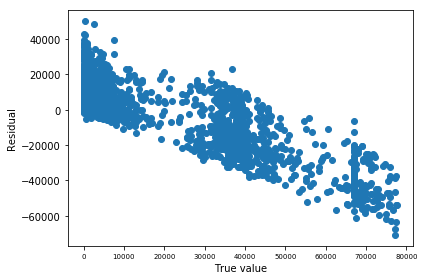

In [269]:
MLModels.catb_regressor_gridsearchcv(X_train, y_train, X_test, y_test)

In [327]:
def standarization(df):
    scaler = StandardScaler()
    scaler.fit(df.select_dtypes(include= 'number'))
    result= pd.concat([pd.DataFrame(scaler.transform(df.select_dtypes(include= 'number')), columns=df.select_dtypes(include= 'number').columns).reset_index(drop=True), df.select_dtypes(exclude= 'number').reset_index(drop=True) ], axis=1)
    return result

In [315]:
result=standarization(sample_new)

In [316]:
result.shape

(9838, 603)

(array([6787.,  275.,  254., 1224.,  601.,  129.,  177.,  256.,   92.,
          43.]),
 array([-0.69114687, -0.22675199,  0.2376429 ,  0.70203778,  1.16643267,
         1.63082755,  2.09522244,  2.55961732,  3.0240122 ,  3.48840709,
         3.95280197]),
 <a list of 10 Patch objects>)

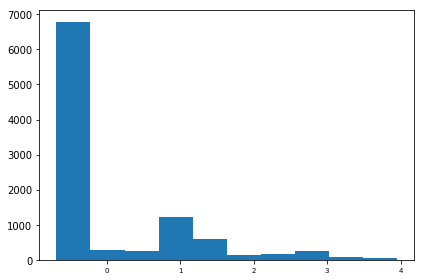

In [326]:
plt.hist(result['dep_lifetime_value']-result['dep_lifetime_value'].mean()/ result['dep_lifetime_value'].std())

In [324]:
result['dep_lifetime_value'].mean()

2.753551717915615e-18

In [337]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.10.0


In [355]:

def build_model():
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                15040     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 19,265
Trainable params: 19,265
Non-trainable params: 0
_________________________________________________________________


In [340]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

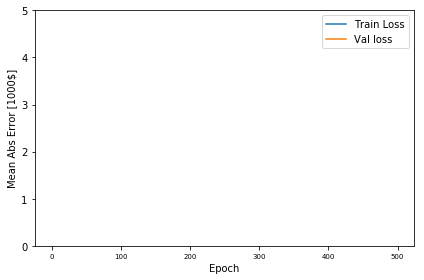

In [341]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])

plot_history(history)


.........................................................

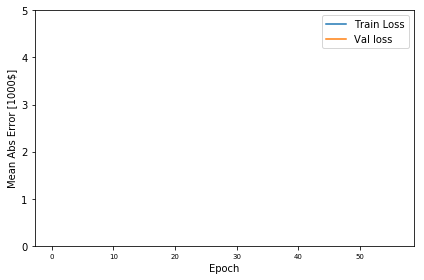

In [342]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [372]:
from directoryPath import mlresult_dir
def summary_function(df,p=0.5, file_name_prefix=" "):
    '''
    Takes a dataframe and returns summary details about Count of row, columns, no of numeric variables, no of categorical variables etc for entire data set
    Parameters
    --------
    df: A dataframe
    p: 
    Returns: A Datframe containing Count of row, columns, no of numeric variables, no of categorical variables for entire data set
    '''
    df_11=df
    df=df._get_numeric_data()
    df_names=df.columns

    col_nonmiss= df.apply(lambda x: x.count(), axis=0)
    col_miss = df.shape[0] - col_nonmiss
    col_mean=df[df_names].mean(axis=0)
    col_min=df[df_names].min(axis=0)
    col_max=df[df_names].max(axis=0)
    col_std=df[df_names].std(axis=0)
    col_median=df[df_names].median(axis=0)
    col_quantiles=df.quantile(p)

    total_miss_percent= sum(col_miss)
    total_miss_percent=100.0*(total_miss_percent/(df_11.shape[0]*df_11.shape[1]))
    total_nonmiss_percent=abs(100-total_miss_percent)
    col_miss_max=(col_miss.max()/df_11.shape[0])*100.0
    col_miss_min=(col_miss[col_miss!=0].min()/df_11.shape[0])*100.0
    
    n_numnericCol_per=(len(df_names)/len(df_11.columns))*100.00
    n_non_numericCol_per=100.0-n_numnericCol_per
    
    hist_array=[]
    hist_array.append(total_miss_percent)
    hist_array.append(total_nonmiss_percent)
    hist_array.append(col_miss_max)
    hist_array.append(col_miss_min)
    hist_array.append(n_numnericCol_per)
    hist_array.append(n_non_numericCol_per)
    
    x_label=["Total \n miss (%)","Total \n nonmiss(%)","Max miss \n for Col(%)","Min miss \n for Col(%)", "n_numneric \n Col (%)", "n_non_ \numeric Col (%)"]
    
    plt.bar(x_label,hist_array, width=0.3)
    
    #plt.xticks(rotation=7)
    plt.savefig(mlresult_dir +'_data_summary_hist_'+file_name_prefix + str(datetime.datetime.now().day)+ ':' + str(datetime.datetime.now().month) + ':' + str(datetime.datetime.now().year) + ' ' + str(datetime.datetime.now().hour)+ ':' + str(datetime.datetime.now().minute) + '.' + 'png')
    plt.ylabel('Percentage')


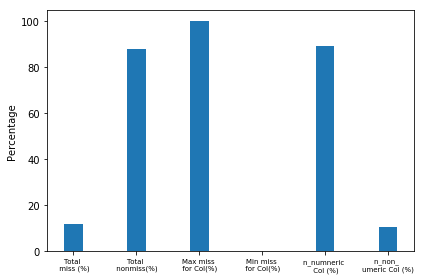

In [373]:
summary_function(sample)

In [405]:
import numpy as np
import datetime
import pandas as pd
import sklearn 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
import data_prep as prep
from config_param import project_identifier
from directoryPath import mlresult_dir

def plot_feature_ranking(X,y, estimator='lin'):
    '''
    plots feature rankings for all columns
    parameter
    -------
    X: Data frame of Indepenedent columns
    y: Target Variable
    estimator: Algorithm to measure rank of the features. Options-
    lin = Linear Regression
    lasso= Lasso
    ridge= Ridge
    svm= Support Vector Machine
    dt= Decision Tree Regressor
    rf= Random Forest Regressor
    boost= Ada Boost Regressor
    
    '''
    # Create the RFE object and rank each feature
    
    lasso=sklearn.linear_model.Lasso()
    ridge=sklearn.linear_model.Ridge()
    svm=sklearn.svm.SVR()
    dt=sklearn.tree.DecisionTreeRegressor()
    rf=sklearn.ensemble.RandomForestRegressor()
    boost=sklearn.ensemble.AdaBoostRegressor()
    lin=sklearn.linear_model.LinearRegression()
    
    estimator_dict= {'lin': lin, 'ridge': ridge, 'lasso': lasso, 'svm': svm, 'dt': dt, 'rf': rf, 'boost':boost} 
    
    rfe = RFE(estimator_dict[estimator], n_features_to_select=100)
    rfe.fit(X_encoded, y)
    ranking = rfe.ranking_
    rank_df_lasso=pd.Series(ranking, index=X_encoded.columns)
    print(rank_df_lasso[rank_df_lasso.sort_values()<2])
    
    #Plot pixel ranking
    plt.hist(ranking)
    plt.title("Ranking of independent with RFE")
    plt.xlabel('Rank of Features')
    plt.ylabel('Number of Features')

    #feature_importance= pd.Series(xgb.feature_importances_, X.columns)
    plt.savefig("../mlresults/"+ 'feature_ranking '+ str(datetime.datetime.now().day)+ ':' + str(datetime.datetime.now().month) + ':' + str(datetime.datetime.now().year) + ' ' + str(datetime.datetime.now().hour)+ ':' + str(datetime.datetime.now().minute) + '.' + 'png')

   

no_owned_vehicle                         1
owned_lexus_new_luv_ind                  1
owned_lexus_cpo_luv_ind                  1
owned_big_engine_vehicle_ind             1
multiple_vehicle_type_ind                1
owned_lexus_sedan_no                     1
owned_is250_ind                          1
owned_rx_ind                             1
owned_ls_ind                             1
owned_gs_ind                             1
owned_silver_gray_vehicle_ind            1
owned_green_vehicle_ind                  1
owned_aqua_vehicle_ind                   1
owned_other_color_vehicle_ind            1
owned_vehicle_my_1991_00_ind             1
owned_vehicle_my_2011_20_ind             1
purchased_lexus_sedan_last_2years_ind    1
purchased_is_last_3years_ind             1
current_owned_lexus_sedan_ind            1
current_owned_lexus_LUV_ind              1
current_owned_lexus_new_luv_ind          1
current_owned_lexus_new_sedan_ind        1
current_owned_lexus_cpo_luv_ind          1
current_own

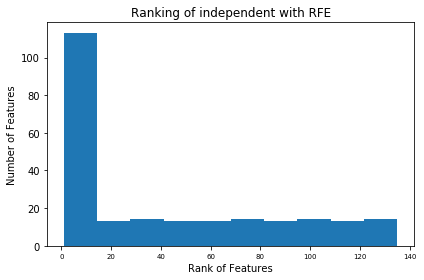

In [406]:
plot_feature_ranking(X, y)

In [407]:
def selecting_common_col(df_in1, df_in2):
    if len(df_in1.columns) > len(df_in2.columns): #first data
        col2=df_in2.columns
        df_out1=df_in1[col2]
        df_out2=df_in2
        
    elif len(df_in2.columns) > len(df_in1.columns): #second data
        col1=df_in1.columns
        df_out2=df_in2[col1]
        df_out1=df_in1
        
    else:
        df_out1=df_in1
        df_out2=df_in2


    return df_out1, df_out2

In [409]:
df_out1, df_out2=selecting_common_col(X_test, X_train)

In [413]:
df_out2.shape

(6886, 234)

In [414]:
df_out1.shape

(2952, 234)